## Context:
I've conducted an Performance Analysis on the 2023 MLB World Series. The dataset includes a diverse set of pitching and batting stats for each player. These stats shed light on the performance elements that led to a World Series Victory. 

## Objective

Create visualizations comparing the teams performance during the regular seasons and world series. 

## Data Dictionary

### Pitching 
#### Playoff Series Stats
* G -- Games Played or Pitched
* GS -- Games Started
* ERA -- 9 * ER / IP
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.
* W -- Wins
* L -- Losses
* SV -- Saves
* CG -- Complete Game
* IP -- Innings Pitched
* H -- Hits/Hits Allowed
* R -- Runs Scored/Allowed
* ER -- Earned Runs Allowed
* BB -- Bases on Balls/Walks
* SO -- Strikeouts
* WHIP -- (BB + H)/IP
For recent years, leaders need 1 IP
per team game played
* WPA -- Win Probability Added by Pitcher
Given average teams, this is the change in probability
A change of +/- 1 would indicate one win added or lost.
* cWPA -- Championship Win Probability Added by Pitcher
Given average teams, this is the change in probability, displayed in percentage points.
A change of +/- 100% would indicate one world series win added or lost.

#### Regular Season Stats
* G -- Games Played or Pitched
** indicates player was with multiple teams
* GS -- Games Started
* ERA -- 9 * ER / IP
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.
* W -- Wins
* L -- Losses
* SV -- Saves
* IP -- Innings Pitched
* H -- Hits/Hits Allowed
* BB -- Bases on Balls/Walks
* SO -- Strikeouts
* WHIP -- (BB + H)/IP
For recent years, leaders need 1 IP
per team game played

### Batting 
#### Playoff Series Stats
* G -- Games Played or Pitched
* GS -- Games Started
* ERA -- 9 * ER / IP
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.
* W -- Wins
* L -- Losses
* SV -- Saves
* CG -- Complete Game
* IP -- Innings Pitched
* H -- Hits/Hits Allowed
* R -- Runs Scored/Allowed
* ER -- Earned Runs Allowed
* BB -- Bases on Balls/Walks
* SO -- Strikeouts
* WHIP -- (BB + H)/IP
For recent years, leaders need 1 IP
per team game played
* WPA -- Win Probability Added by Pitcher
Given average teams, this is the change in probability
A change of +/- 1 would indicate one win added or lost.
* cWPA -- Championship Win Probability Added by Pitcher
Given average teams, this is the change in probability, displayed in percentage points.
A change of +/- 100% would indicate one world series win added or lost.

#### Regular Season Stats
* G -- Games Played or Pitched
** indicates player was with multiple teams
* GS -- Games Started
* ERA -- 9 * ER / IP
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.
* W -- Wins
* L -- Losses
* SV -- Saves
* IP -- Innings Pitched
* H -- Hits/Hits Allowed
* BB -- Bases on Balls/Walks
* SO -- Strikeouts
* WHIP -- (BB + H)/IP
For recent years, leaders need 1 IP
per team game played

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #graphing
import plotly.express as px #graphing
import seaborn as sns #graphing

sns.set(rc = {"figure.figsize":(12, 8)}) #graph size
plt.style.use("fivethirtyeight")

* pulled all data from "https://www.baseball-reference.com/postseason/2023_WS.shtml"

In [2]:
# Define the file paths for the CSV files
csv_files = ['~/Downloads/txp.csv', '~/Downloads/txb.csv', '~/Downloads/azp.csv', '~/Downloads/azb.csv']

# Create an empty list to store the DataFrames
dataframes = []

# Load each CSV file into a separate DataFrame
for file_path in csv_files:
    df = pd.read_csv(file_path, header=1)  # Set header=1 to use the second row as column titles
    dataframes.append(df)

# Now you have four DataFrames: dataframes[0], dataframes[1], dataframes[2], and dataframes[3]
# Each DataFrame corresponds to one of the CSV files (txp.csv, txb.csv, azp.csv, azb.csv)

# Access and read data from the DataFrames
df_txp = dataframes[0]  # This is the DataFrame for 'txp.csv'
df_txb = dataframes[1]  # This is the DataFrame for 'txb.csv'
df_azp = dataframes[2]  # This is the DataFrame for 'azp.csv'
df_azb = dataframes[3]  # This is the DataFrame for 'azb.csv'

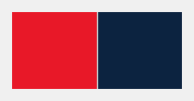

In [3]:
team_colors = ["#E81828", # Rangers
               "#0C2340", # Diamondbacks
              ]

sns.palplot(sns.color_palette(team_colors))

### Texas Rangers Pitching, includes WS and Regular season

In [4]:
df_txp.head()

,Name,G,GS,ERA,W,L,SV,CG,IP,H,...,GS.1,ERA.1,W.1,L.1,SV.1,IP.1,H.1,BB.1,SO.1,WHIP.1
0,Cody Bradford*,2,0,0.00,0,0,0,0,2.0,0,...,8,5.30,4,3,0,56.0,56,12,51,1.214
1,Brock Burke*,1,0,81.00,0,0,0,0,0.1,3,...,0,4.37,5,3,0,59.2,64,9,52,1.223
2,Aroldis Chapman*,2,0,5.40,0,0,0,0,1.2,2,...,0,3.09,6,5,6,58.1,37,36,103,1.251
3,Dane Dunning,3,0,0.00,0,0,0,0,2.1,3,...,26,3.70,12,7,0,172.2,163,55,140,1.263
4,Nathan Eovaldi,2,2,4.22,1,0,0,0,10.2,10,...,25,3.63,12,5,0,144.0,117,47,132,1.139


### Texas Rangers Batting, includes WS and Regular season

In [5]:
df_txb.head()

,Name,G,AB,R,H,2B,3B,HR,RBI,BB,...,cWPA,G.1,AB.1,R.1,H.1,HR.1,RBI.1,SB.1,BA.1,OPS.1
0,Cody Bradford*,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brock Burke*,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Evan Carter*,5,21.0,1.0,6.0,3.0,0.0,0.0,1.0,1.0,...,2.47%,23,62.0,15.0,19.0,5.0,12.0,3.0,0.306,1.058
3,Aroldis Chapman*,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,*1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Dane Dunning,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Arizona Diamondbacks Pitching, includes WS and Regular season

In [6]:
df_azp.head()

,Name,G,GS,ERA,W,L,SV,CG,IP,H,...,GS.1,ERA.1,W.1,L.1,SV.1,IP.1,H.1,BB.1,SO.1,WHIP.1
0,Miguel Castro,3,0,36.00,0,1,0,0,1.0,4,...,0,4.31,6,6,7,64.2,51,25,60,1.175
1,Luis FrÃ­as,3,0,0.00,0,0,0,0,3.0,2,...,0,4.06,1,0,0,31.0,30,17,26,1.516
2,Zac Gallen,2,2,3.18,0,1,0,0,11.1,7,...,34,3.47,17,9,0,210.0,188,47,220,1.119
3,Kevin Ginkel,2,0,0.00,0,0,0,0,2.2,2,...,0,2.48,9,1,4,65.1,41,23,70,0.980
4,Merrill Kelly,1,1,1.29,1,0,0,0,7.0,3,...,30,3.29,12,8,0,177.2,143,69,187,1.193


### Arizona Diamondbacks Batting, includes WS and Regular season

In [7]:
df_azb.head()

,Name,G,AB,R,H,2B,3B,HR,RBI,BB,...,cWPA,G.1,AB.1,R.1,H.1,HR.1,RBI.1,SB.1,BA.1,OPS.1
0,Corbin Carroll*,5,22.0,2.0,5.0,0.0,1.0,0.0,4.0,2.0,...,-2.05%,155,565.0,116.0,161.0,25.0,76.0,54.0,0.285,0.868
1,Miguel Castro,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Luis FrÃ­as,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Zac Gallen,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Ginkel*,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00%,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


### Adding Team Names to dataset & merging them

In [8]:
# Add a new column "Team" with the value "Rangers" to df_txb as the first column (column 0)
df_txb.insert(0, "Team", "Rangers")

In [9]:
# Add a new column "Team" with the value "Rangers" to df_txb as the first column (column 0)
df_txp.insert(0, "Team", "Rangers")

* Added the column Team to identify each player on the Rangers before merging the datasets. 

In [10]:
# Add a new column "Team" with the value "Diamondbacks" to df_txb as the first column (column 0)
df_azp.insert(0, "Team", "Diamondbacks")

In [11]:
# Add a new column "Team" with the value "Diamondbacks" to df_txb as the first column (column 0)
df_azb.insert(0, "Team", "Diamondbacks")

* Added the column Team to identify each player on the Diamondbacks before merging the datasets. 

In [12]:
# Assuming df_txb and df_azb are the DataFrames you want to merge
bat = pd.concat([df_txb, df_azb], ignore_index=True)


* Merged the Rangers & Diamondbacks datasets in order to work more efficiently. 

In [13]:
# Assuming df_txb and df_azb are the DataFrames you want to merge
pit = pd.concat([df_txp, df_azp], ignore_index=True)


* Merged the Rangers & Diamondbacks datasets in order to work more efficiently. 

## Batting Stats

In [14]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    54 non-null     object 
 1   Name    54 non-null     object 
 2   G       54 non-null     object 
 3   AB      52 non-null     float64
 4   R       52 non-null     float64
 5   H       52 non-null     float64
 6   2B      52 non-null     float64
 7   3B      52 non-null     float64
 8   HR      52 non-null     float64
 9   RBI     52 non-null     float64
 10  BB      52 non-null     float64
 11  SO      52 non-null     float64
 12  BA      24 non-null     float64
 13  OBP     25 non-null     float64
 14  SLG     24 non-null     float64
 15  OPS     24 non-null     float64
 16  SB      52 non-null     float64
 17  CS      52 non-null     float64
 18  E       46 non-null     float64
 19  WPA     52 non-null     float64
 20  cWPA    52 non-null     object 
 21  G.1     54 non-null     object 
 22  AB.1

* Upon further review, the dataset contains stats from the regular season as well. 

## Pitching Stats

In [15]:
pit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    26 non-null     object 
 1   Name    26 non-null     object 
 2   G       26 non-null     int64  
 3   GS      26 non-null     int64  
 4   ERA     26 non-null     float64
 5   W       26 non-null     int64  
 6   L       26 non-null     int64  
 7   SV      26 non-null     int64  
 8   CG      26 non-null     int64  
 9   IP      26 non-null     float64
 10  H       26 non-null     int64  
 11  R       26 non-null     int64  
 12  ER      26 non-null     int64  
 13  BB      26 non-null     int64  
 14  SO      26 non-null     int64  
 15  WHIP    26 non-null     float64
 16  WPA     26 non-null     float64
 17  cWPA    26 non-null     object 
 18  G.1     26 non-null     object 
 19  GS.1    26 non-null     int64  
 20  ERA.1   26 non-null     float64
 21  W.1     26 non-null     int64  
 22  L.1 

* Upon further review, the dataset contains stats from the regular season as well. 

## Indentifying the columns

In [16]:
# Assuming df is your DataFrame
for i, column in enumerate(bat.columns):
    print(f"Column {i}: {column}")

Column 0: Team
Column 1: Name
Column 2: G
Column 3: AB
Column 4: R
Column 5: H
Column 6: 2B
Column 7: 3B
Column 8: HR
Column 9: RBI
Column 10: BB
Column 11: SO
Column 12: BA
Column 13: OBP
Column 14: SLG
Column 15: OPS
Column 16: SB
Column 17: CS
Column 18: E
Column 19: WPA
Column 20: cWPA
Column 21: G.1
Column 22: AB.1
Column 23: R.1
Column 24: H.1
Column 25: HR.1
Column 26: RBI.1
Column 27: SB.1
Column 28: BA.1
Column 29: OPS.1


* Columns 2-21 will be deleted for the rsb dataset, which is our regular season stats
* Columns 21-30 will be deleted for the wsb dataset, which is our world series stats

### Creating a copy of the data

In [17]:
wsb = bat.copy()

In [18]:
columns_to_delete = list(range(21, 30))
wsb = wsb.drop(wsb.columns[columns_to_delete], axis=1)

* removed columns 21-30 that are part of the regular season stats.

## wsb should only contain the World Series batting stats. 

In [19]:
wsb

,Team,Name,G,AB,R,H,2B,3B,HR,RBI,...,SO,BA,OBP,SLG,OPS,SB,CS,E,WPA,cWPA
0,Rangers,Cody Bradford*,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
1,Rangers,Brock Burke*,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
2,Rangers,Evan Carter*,5,21.0,1.0,6.0,3.0,0.0,0.0,1.0,...,8.0,0.286,0.348,0.429,0.776,0.0,0.0,0.0,0.08,2.47%
3,Rangers,Aroldis Chapman*,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
4,Rangers,Dane Dunning,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
5,Rangers,Nathan Eovaldi,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
6,Rangers,Adolis García,3,10.0,1.0,3.0,0.0,0.0,1.0,2.0,...,2.0,0.300,0.500,0.600,1.100,1.0,0.0,0.0,0.57,16.83%
7,Rangers,Mitch Garver,5,19.0,1.0,2.0,0.0,0.0,1.0,3.0,...,6.0,0.105,0.227,0.263,0.490,0.0,0.0,NaN,-0.08,-2.92%
8,Rangers,Jon Gray,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00%
9,Rangers,Robbie Grossman#,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000,0.000,0.000,0.000,0.0,0.0,NaN,0.00,-0.02%


### Creating a copy of the data

In [20]:
rsb = bat.copy()

In [21]:
columns_to_delete = list(range(2, 21))
rsb = rsb.drop(rsb.columns[columns_to_delete], axis=1)

* removed columns 2-21 that are part of the world series stats.

## rsb should only contain the regular season batting stats. 

In [22]:
rsb

,Team,Name,G.1,AB.1,R.1,H.1,HR.1,RBI.1,SB.1,BA.1,OPS.1
0,Rangers,Cody Bradford*,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rangers,Brock Burke*,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rangers,Evan Carter*,23,62.0,15.0,19.0,5.0,12.0,3.0,0.306,1.058
3,Rangers,Aroldis Chapman*,*1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Rangers,Dane Dunning,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rangers,Nathan Eovaldi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rangers,Adolis García,148,555.0,108.0,136.0,39.0,107.0,9.0,0.245,0.836
7,Rangers,Mitch Garver,87,296.0,45.0,80.0,19.0,50.0,0.0,0.270,0.870
8,Rangers,Jon Gray,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,Rangers,Robbie Grossman#,115,353.0,56.0,84.0,10.0,49.0,1.0,0.238,0.734


### Indentifying the columns

In [23]:
# Assuming df is your DataFrame
for i, column in enumerate(pit.columns):
    print(f"Column {i}: {column}")

Column 0: Team
Column 1: Name
Column 2: G
Column 3: GS
Column 4: ERA
Column 5: W
Column 6: L
Column 7: SV
Column 8: CG
Column 9: IP
Column 10: H
Column 11: R
Column 12: ER
Column 13: BB
Column 14: SO
Column 15: WHIP
Column 16: WPA
Column 17: cWPA
Column 18: G.1
Column 19: GS.1
Column 20: ERA.1
Column 21: W.1
Column 22: L.1
Column 23: SV.1
Column 24: IP.1
Column 25: H.1
Column 26: BB.1
Column 27: SO.1
Column 28: WHIP.1


* Columns 2-18 will be deleted for the rsp dataset, which is our regular season stats
* Columns 18-28 will be deleted for the wsp dataset, which is our world series stats

### Creating copy of the dataset

In [24]:
rsp = pit.copy()

In [25]:
columns_to_delete = list(range(2, 18))
rsp = rsp.drop(rsp.columns[columns_to_delete], axis=1)

In [26]:
rsp

,Team,Name,G.1,GS.1,ERA.1,W.1,L.1,SV.1,IP.1,H.1,BB.1,SO.1,WHIP.1
0,Rangers,Cody Bradford*,20,8,5.30,4,3,0,56.0,56,12,51,1.214
1,Rangers,Brock Burke*,53,0,4.37,5,3,0,59.2,64,9,52,1.223
2,Rangers,Aroldis Chapman*,*61,0,3.09,6,5,6,58.1,37,36,103,1.251
3,Rangers,Dane Dunning,35,26,3.70,12,7,0,172.2,163,55,140,1.263
4,Rangers,Nathan Eovaldi,25,25,3.63,12,5,0,144.0,117,47,132,1.139
5,Rangers,Jon Gray,29,29,4.12,9,8,0,157.1,149,54,142,1.290
6,Rangers,Andrew Heaney*,34,28,4.15,10,6,0,147.1,143,60,151,1.378
7,Rangers,JosĆ© Leclerc,57,0,2.68,0,2,4,57.0,37,28,67,1.140
8,Rangers,Jordan Montgomery*,*32,32,3.20,10,11,0,188.2,177,48,166,1.193
9,Rangers,MartĆ­n PĆ©rez*,35,20,4.45,10,4,0,141.2,150,49,93,1.405


### Creating copy of the dataset

In [27]:
wsp = pit.copy()

In [28]:
columns_to_delete = list(range(18, 29))
wsp = wsp.drop(wsp.columns[columns_to_delete], axis=1)

In [29]:
wsp

,Team,Name,G,GS,ERA,W,L,SV,CG,IP,H,R,ER,BB,SO,WHIP,WPA,cWPA
0,Rangers,Cody Bradford*,2,0,0.00,0,0,0,0,2.0,0,0,0,0,1,0.000,0.05,1.65%
1,Rangers,Brock Burke*,1,0,81.00,0,0,0,0,0.1,3,3,3,0,0,9.000,0.00,-0.05%
2,Rangers,Aroldis Chapman*,2,0,5.40,0,0,0,0,1.2,2,1,1,1,2,1.800,0.07,1.83%
3,Rangers,Dane Dunning,3,0,0.00,0,0,0,0,2.1,3,0,0,1,0,1.714,0.08,2.58%
4,Rangers,Nathan Eovaldi,2,2,4.22,1,0,0,0,10.2,10,5,5,6,13,1.500,0.01,-3.72%
5,Rangers,Jon Gray,2,0,0.00,1,0,0,0,4.2,2,0,0,0,7,0.429,0.21,8.23%
6,Rangers,Andrew Heaney*,2,1,1.59,1,0,0,0,5.2,5,1,1,2,3,1.235,0.05,1.82%
7,Rangers,JosĆ© Leclerc,3,0,0.00,1,0,1,0,3.1,1,0,0,0,4,0.300,0.38,12.34%
8,Rangers,Jordan Montgomery*,1,1,6.00,0,1,0,0,6.0,9,4,4,1,0,1.667,-0.07,-3.12%
9,Rangers,MartĆ­n PĆ©rez*,1,0,27.00,0,0,0,0,1.1,5,4,4,2,1,5.250,-0.07,-2.37%


# Texas Rangers World Series Batting Stats
* Our data set is now only World Series batting stats. 

In [30]:
wsb[wsb["Team"] == "Rangers"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
AB,27.000000,6.444444,8.950004,0.000000,0.000000,0.000000,16.500000,24.000000
R,27.000000,0.962963,1.580688,0.000000,0.000000,0.000000,1.500000,6.000000
H,27.000000,1.407407,2.373885,0.000000,0.000000,0.000000,2.000000,7.000000
2B,27.000000,0.259259,0.655896,0.000000,0.000000,0.000000,0.000000,3.000000
3B,27.000000,0.037037,0.192450,0.000000,0.000000,0.000000,0.000000,1.000000
HR,27.000000,0.296296,0.724028,0.000000,0.000000,0.000000,0.000000,3.000000
RBI,27.000000,0.888889,1.967688,0.000000,0.000000,0.000000,0.500000,8.000000
BB,27.000000,0.703704,1.203035,0.000000,0.000000,0.000000,1.000000,3.000000
SO,27.000000,1.629630,2.451815,0.000000,0.000000,0.000000,3.000000,8.000000
BA,12.000000,0.183250,0.133522,0.000000,0.078750,0.231000,0.287500,0.350000


# Texas Rangers Regular Season Batting Stats
* Our data set is now only regular season batting stats. 

In [31]:
rsb[rsb["Team"] == "Rangers"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
AB.1,18.000000,306.444444,229.430810,0.000000,92.750000,324.500000,477.750000,670.000000
R.1,18.000000,47.666667,38.922245,0.000000,14.250000,50.000000,73.000000,122.000000
H.1,18.000000,80.611111,63.359979,0.000000,22.750000,82.000000,133.750000,185.000000
HR.1,18.000000,12.722222,12.356497,0.000000,1.000000,12.000000,18.750000,39.000000
RBI.1,18.000000,46.388889,38.813489,0.000000,12.750000,47.500000,79.000000,107.000000
SB.1,18.000000,4.222222,5.936483,0.000000,0.250000,1.000000,6.750000,19.000000
BA.1,15.000000,0.241467,0.076468,0.000000,0.241500,0.263000,0.273000,0.327000
OPS.1,15.000000,0.728800,0.246515,0.000000,0.711000,0.768000,0.831000,1.058000


# Arizona Diamondbacks World Series Batting Stats
* Our data set is now only World Series batting stats. 

In [32]:
wsb[wsb["Team"] == "Diamondbacks"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
AB,25.000000,6.960000,9.158239,0.000000,0.000000,0.000000,18.000000,22.000000
R,25.000000,0.880000,1.129897,0.000000,0.000000,0.000000,2.000000,3.000000
H,25.000000,1.880000,2.587148,0.000000,0.000000,0.000000,4.000000,8.000000
2B,25.000000,0.400000,0.816497,0.000000,0.000000,0.000000,0.000000,3.000000
3B,25.000000,0.040000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000
HR,25.000000,0.120000,0.331662,0.000000,0.000000,0.000000,0.000000,1.000000
RBI,25.000000,0.880000,1.536229,0.000000,0.000000,0.000000,1.000000,5.000000
BB,25.000000,0.640000,1.036018,0.000000,0.000000,0.000000,1.000000,4.000000
SO,25.000000,1.640000,2.360791,0.000000,0.000000,0.000000,4.000000,8.000000
BA,12.000000,0.237083,0.132944,0.000000,0.207750,0.258500,0.297750,0.421000


# Arizona Diamondbacks Regular Season Batting Stats
* Our data set is now only regular season batting stats. 

In [33]:
rsb[rsb["Team"] == "Diamondbacks"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
AB.1,19.000000,262.105263,221.283854,0.000000,15.500000,257.000000,416.500000,582.000000
R.1,19.000000,37.157895,35.912336,0.000000,1.000000,32.000000,60.000000,116.000000
H.1,19.000000,66.210526,59.577754,0.000000,2.000000,67.000000,104.500000,161.000000
HR.1,19.000000,9.105263,10.498120,0.000000,0.000000,6.000000,13.500000,33.000000
RBI.1,19.000000,35.684211,33.694795,0.000000,0.000000,30.000000,59.000000,103.000000
SB.1,19.000000,7.894737,12.969600,0.000000,0.000000,1.000000,10.000000,54.000000
BA.1,14.000000,0.236857,0.042873,0.129000,0.214000,0.251000,0.261000,0.285000
OPS.1,14.000000,0.694571,0.138248,0.335000,0.643250,0.714500,0.773500,0.868000


# World Series Batting Visuals

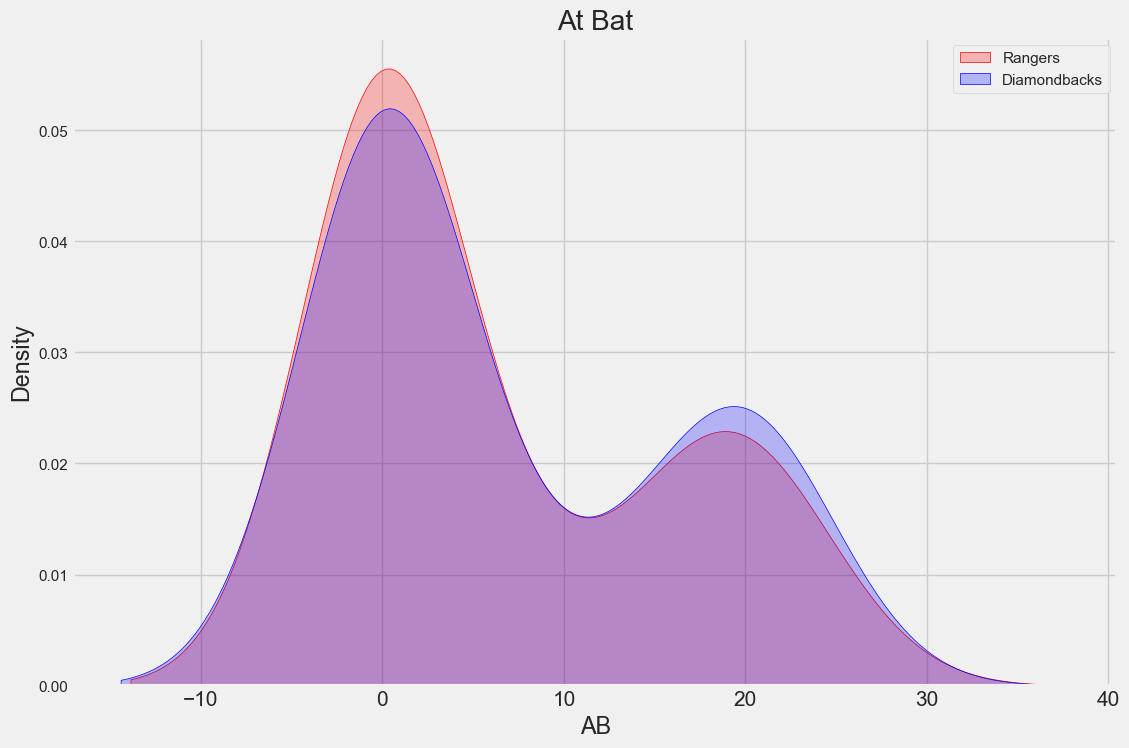

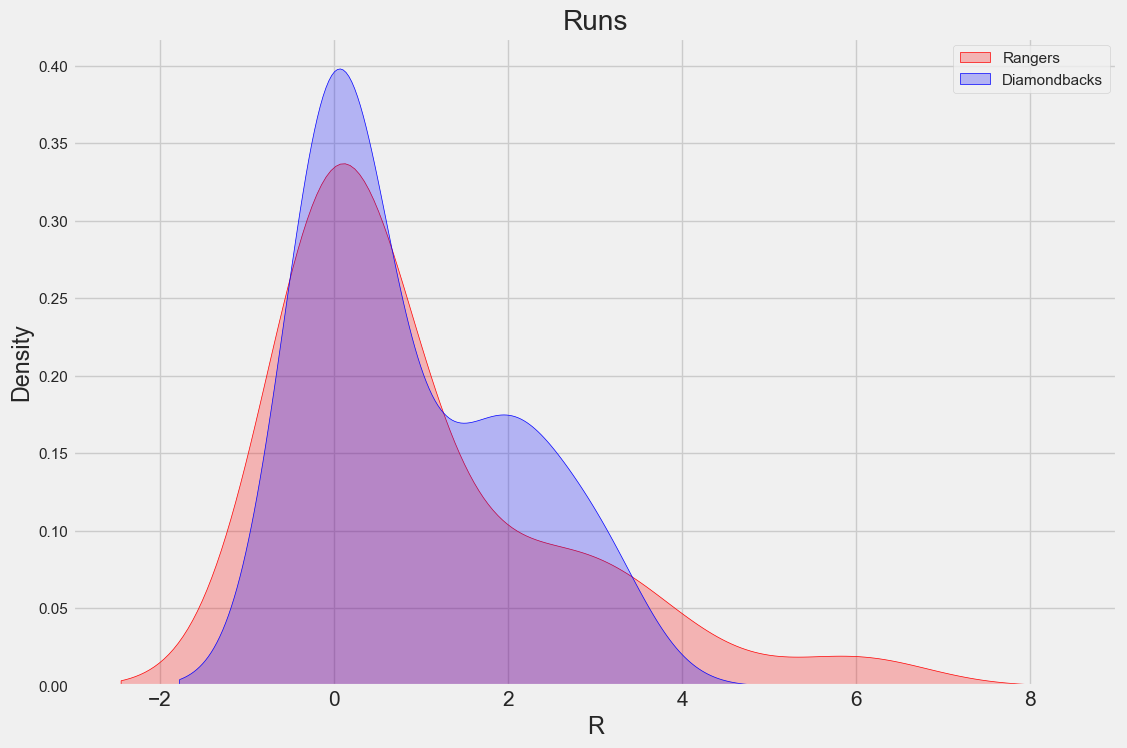

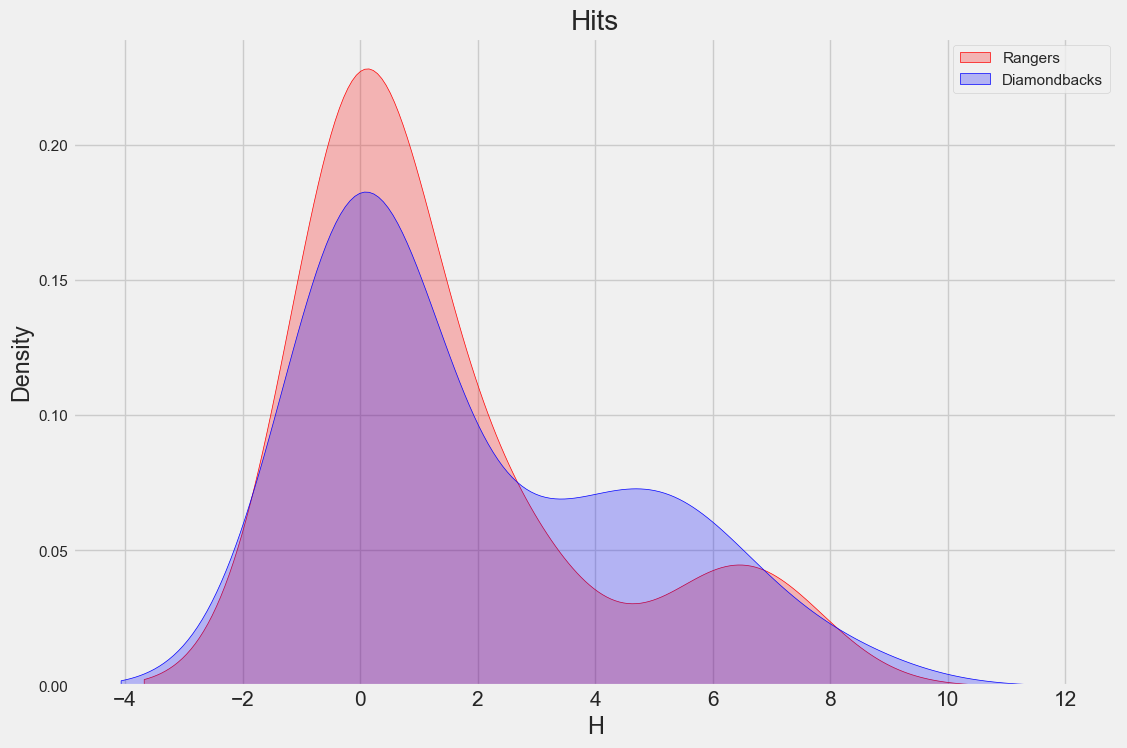

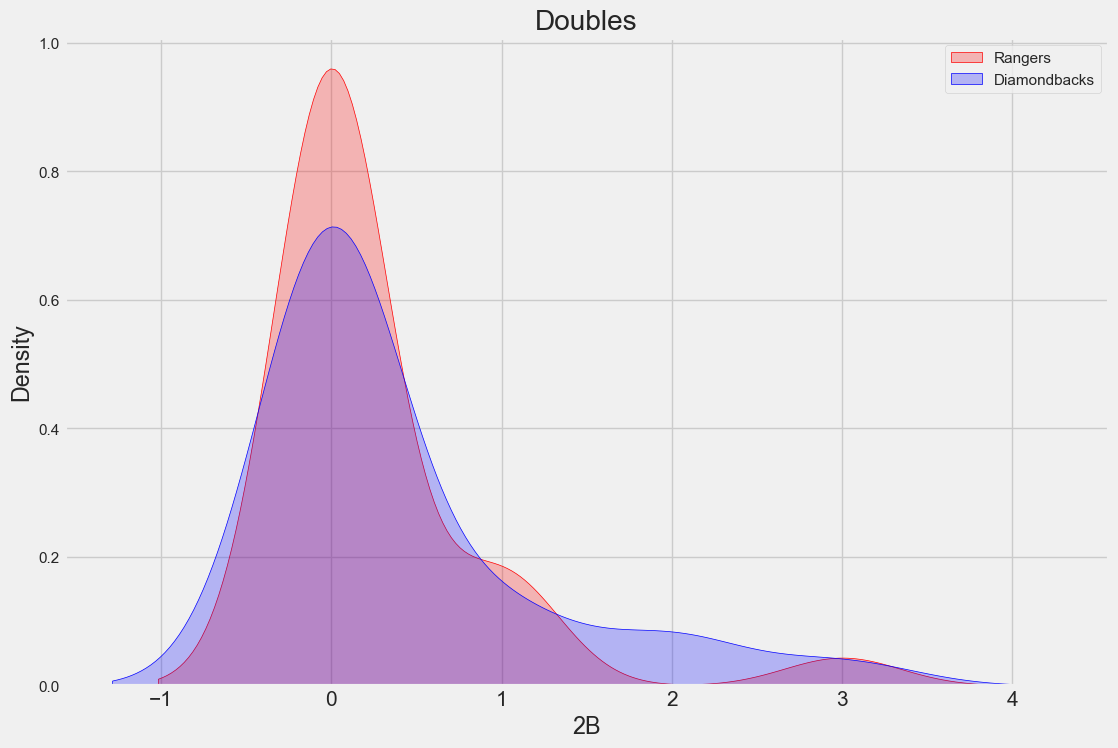

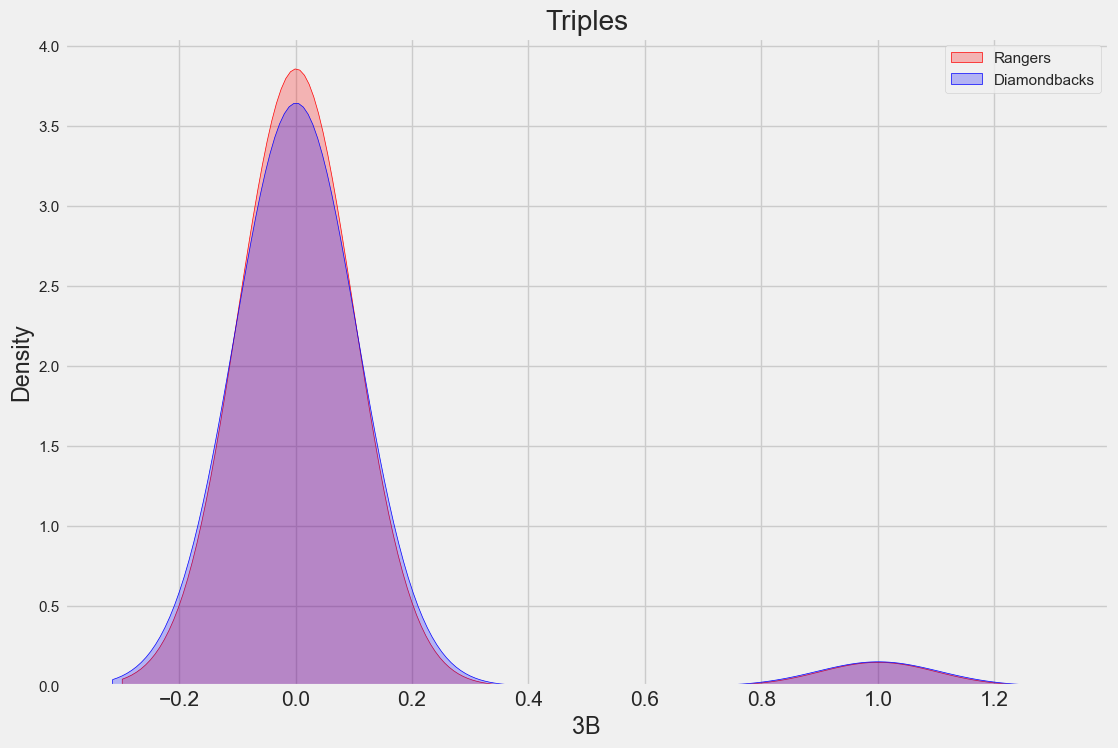

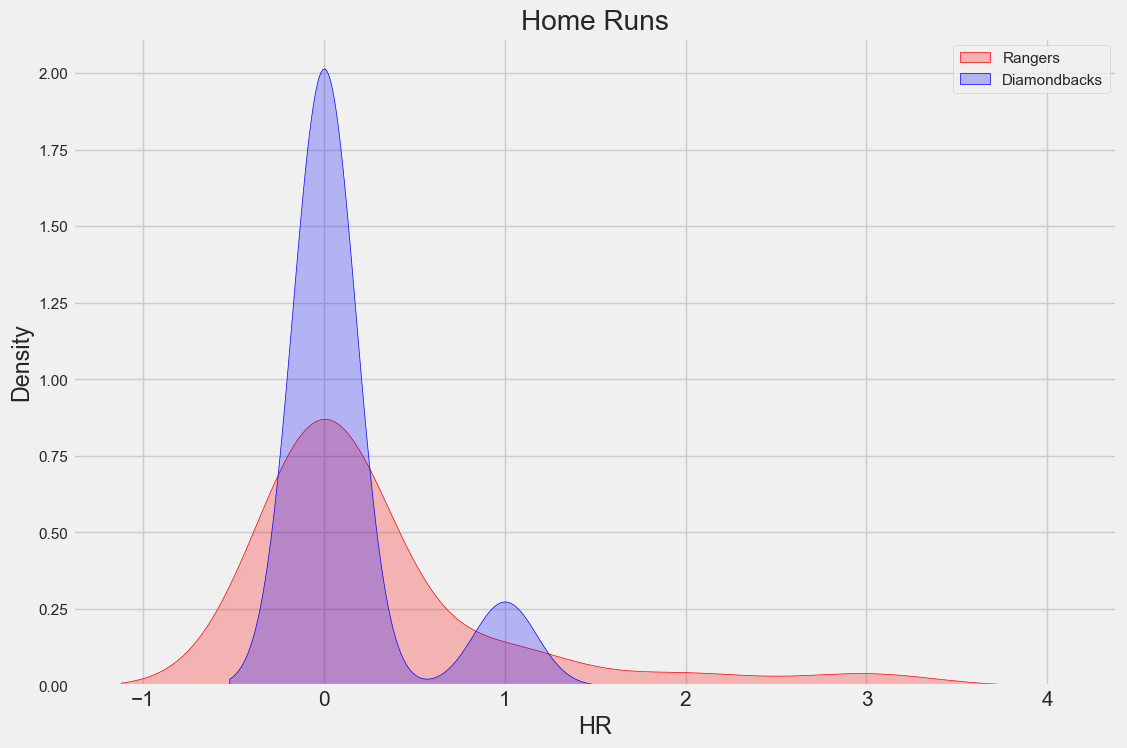

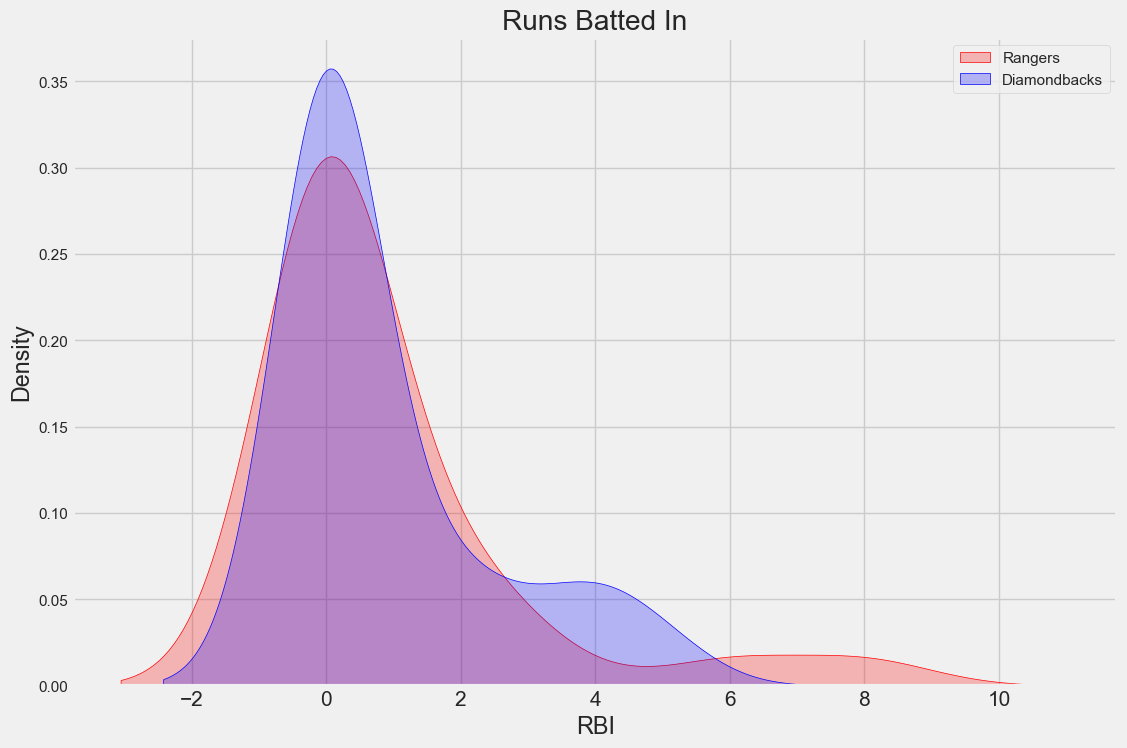

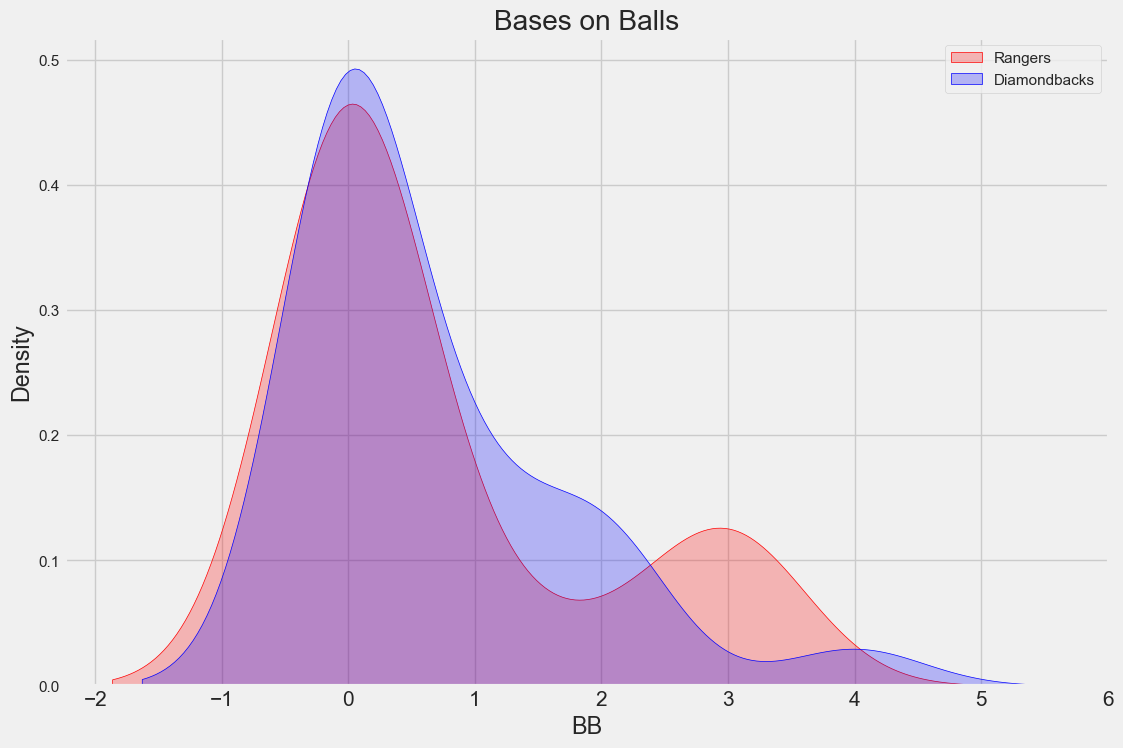

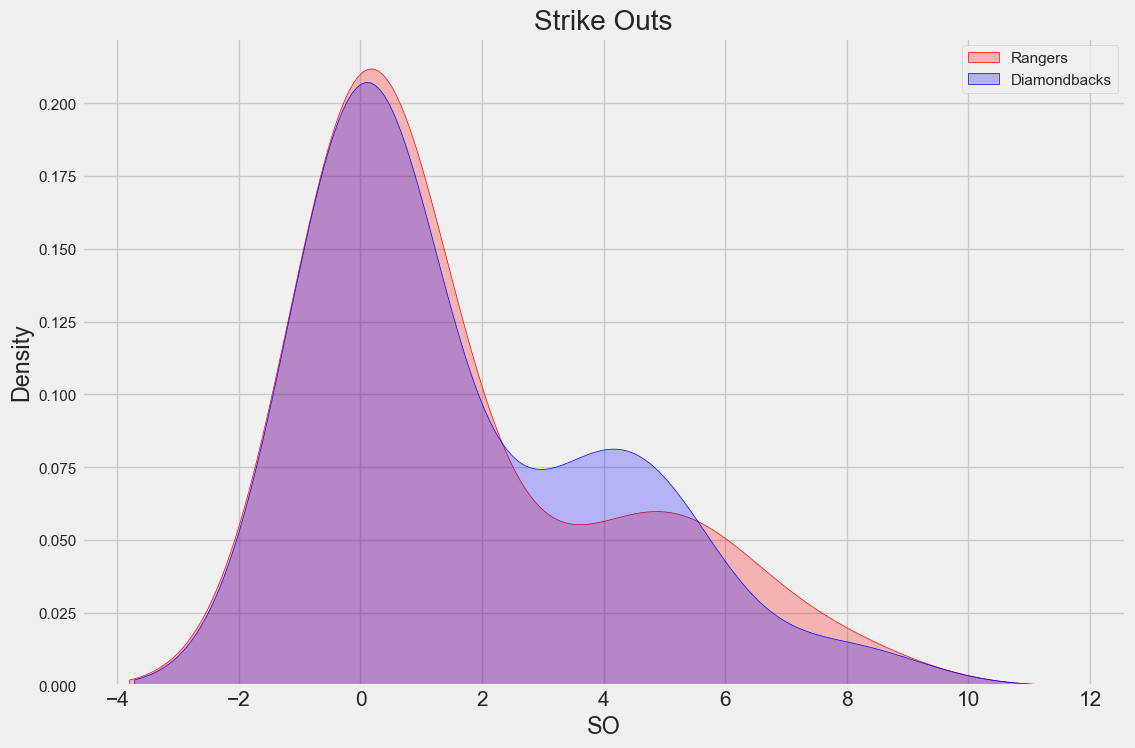

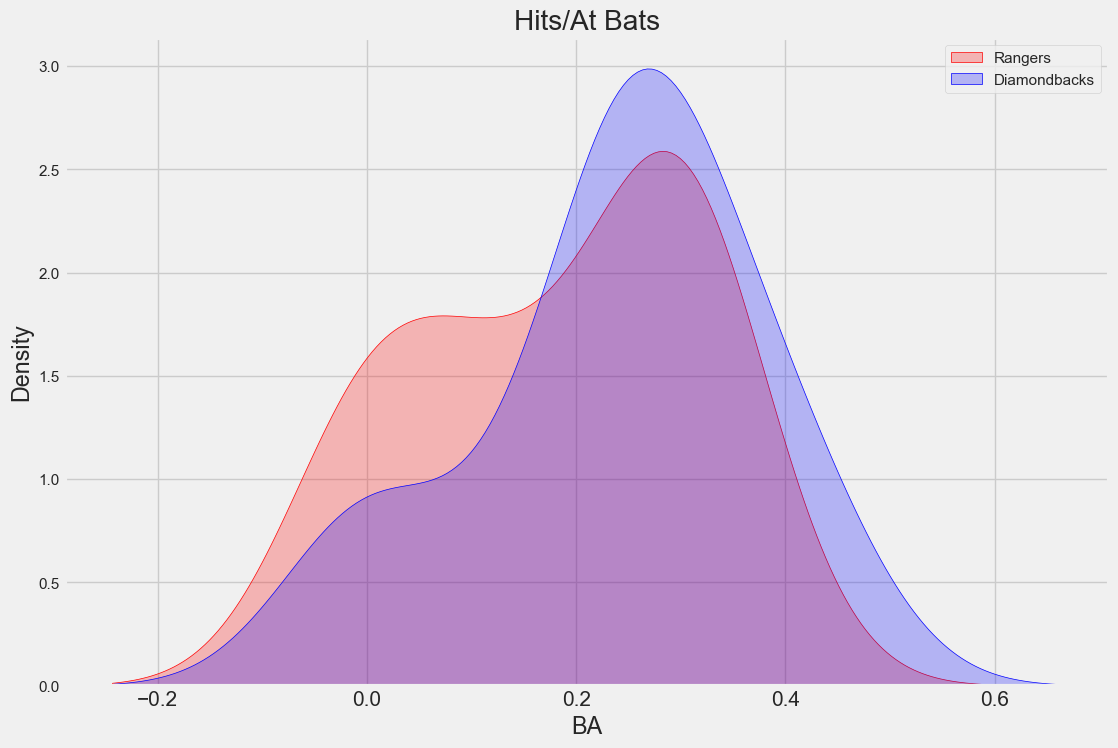

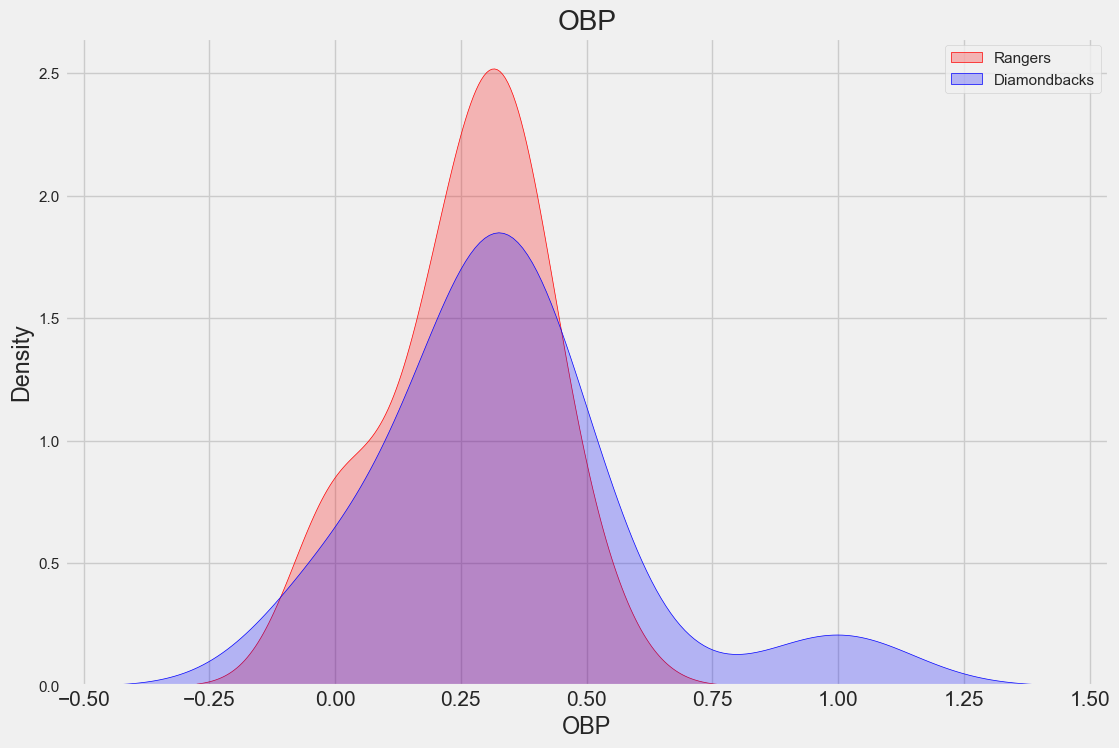

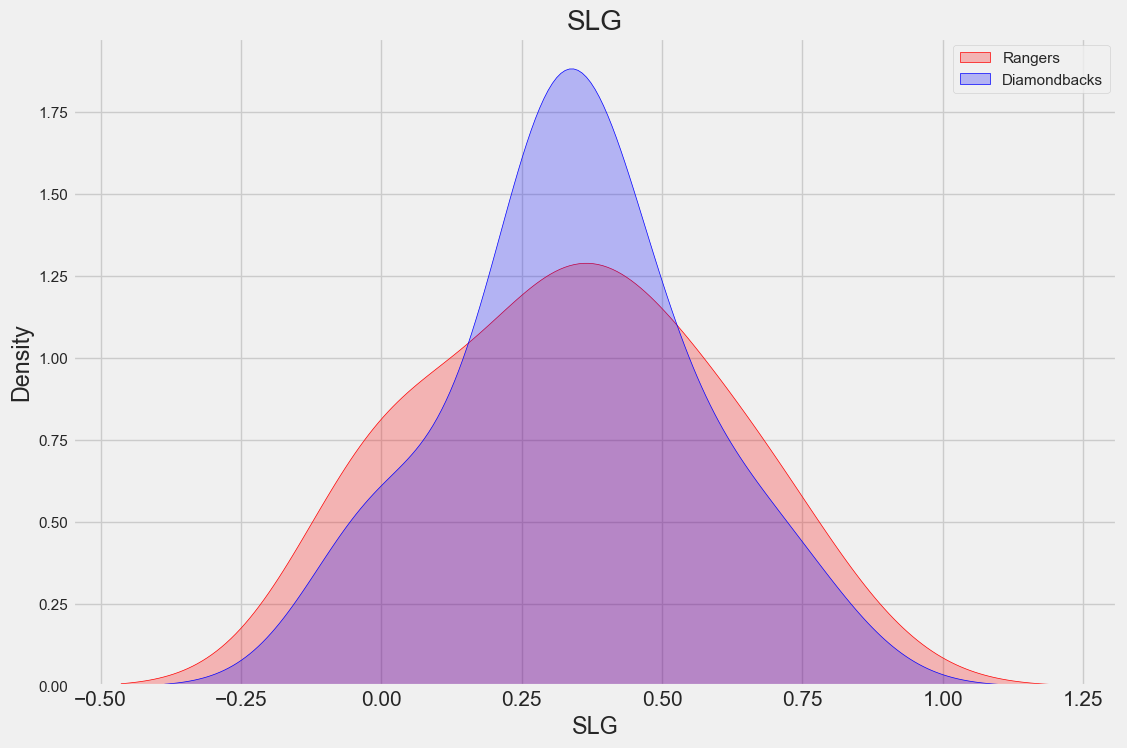

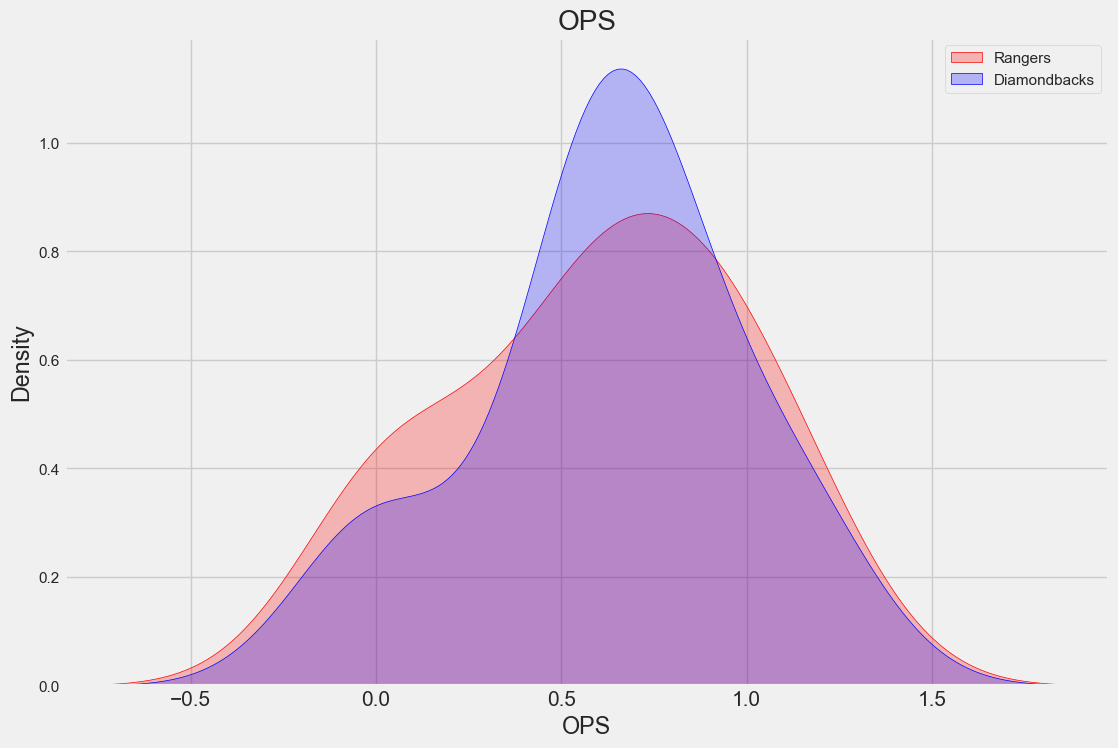

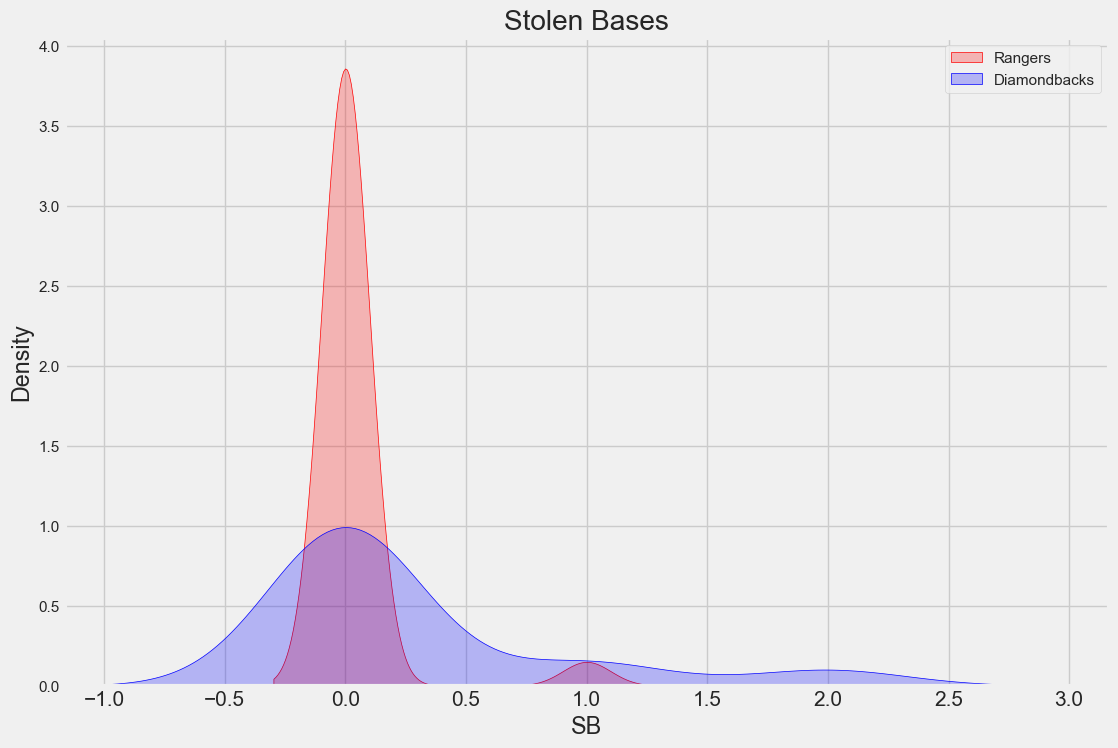

/tmp/ipykernel_94798/550961966.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(wsb.loc[(wsb["Team"] == "Rangers"), i].dropna(),


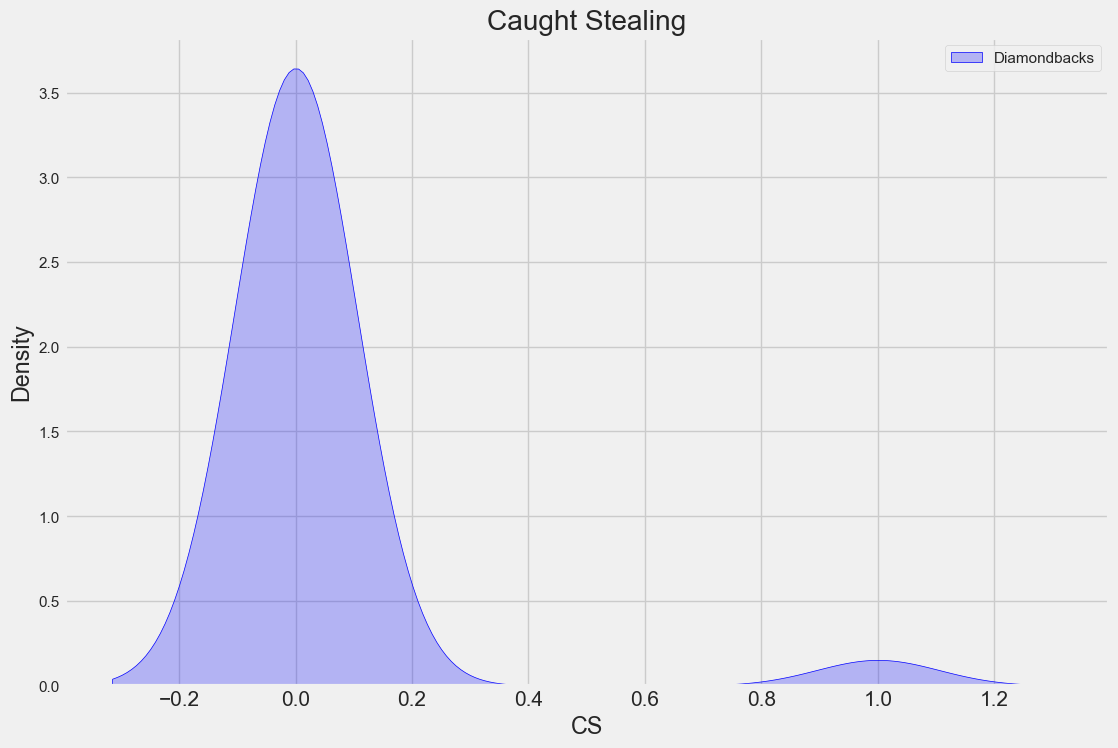

/tmp/ipykernel_94798/550961966.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(wsb.loc[(wsb["Team"] == "Rangers"), i].dropna(),


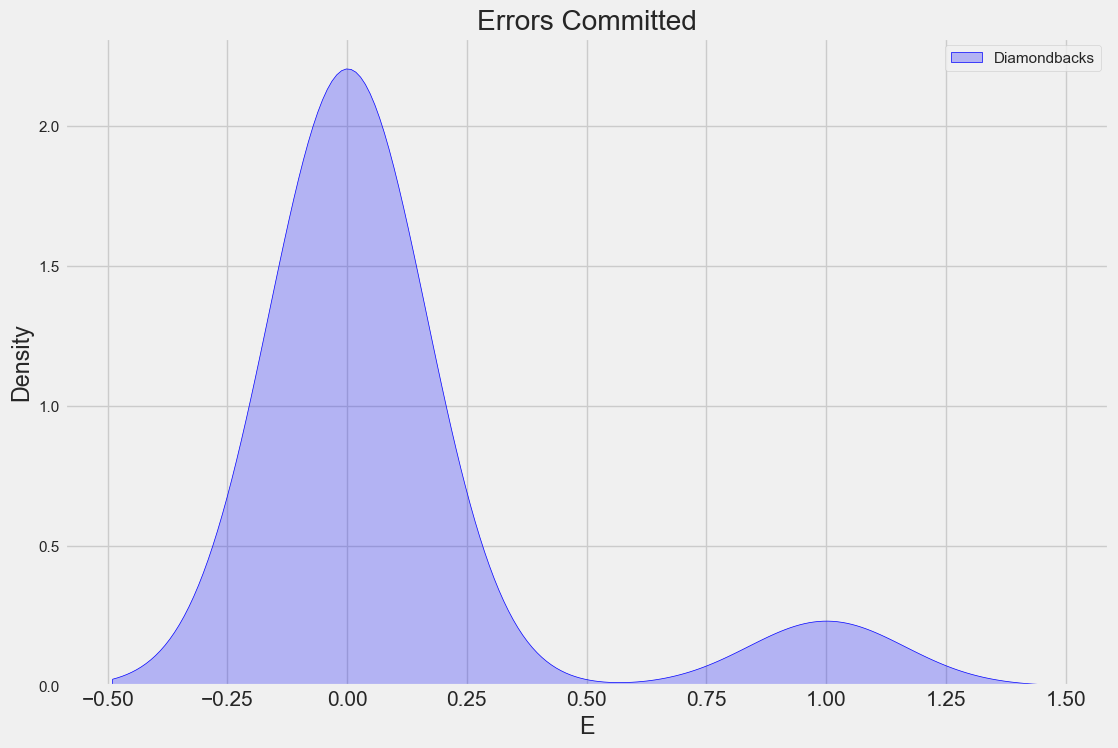

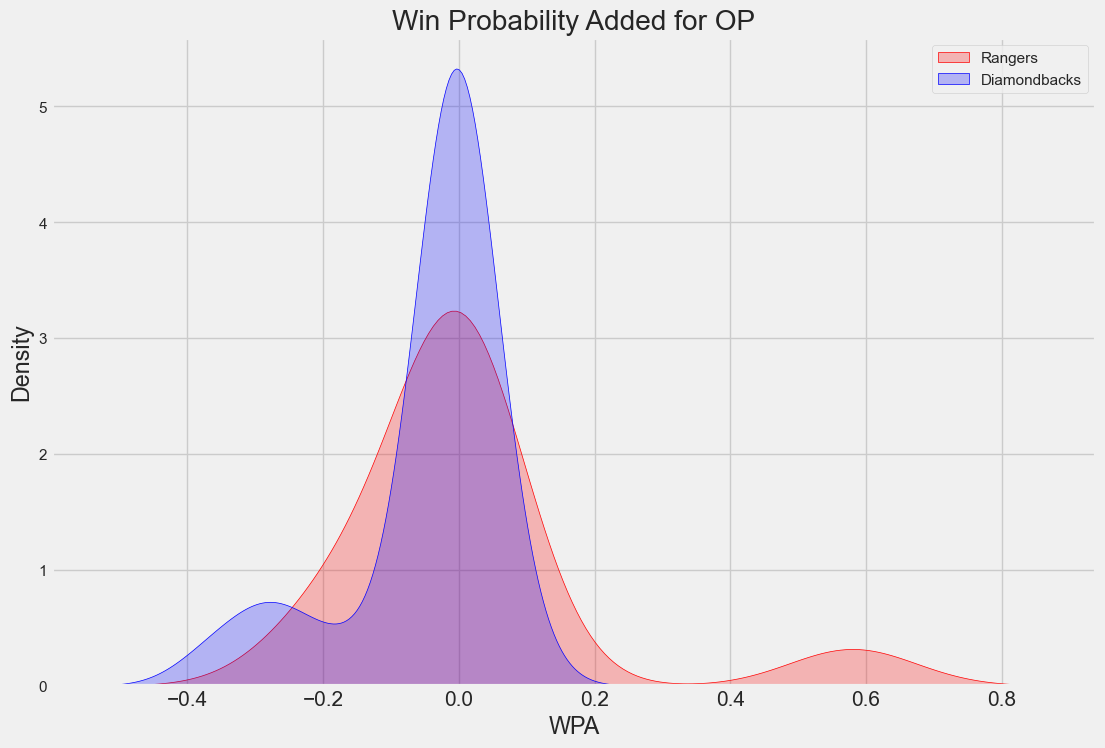

In [34]:
# Define the columns to be plotted
stats = ["At Bat", "Runs", "Hits", "Doubles", "Triples", "Home Runs", "Runs Batted In", "Bases on Balls", "Strike Outs", "Hits/At Bats", "OBP", "SLG", "OPS", "Stolen Bases", "Caught Stealing", "Errors Committed", "Win Probability Added for OP"]

# List of team names and their corresponding colors
team_colors = ["red", "blue"]

j = -1

for i in ["AB", "R", "H", "2B", "3B", "HR", "RBI", "BB", "SO", "BA", "OBP", "SLG", "OPS", "SB", "CS", "E", "WPA"]:
    
    sns.kdeplot(wsb.loc[(wsb["Team"] == "Rangers"), i].dropna(),
                color=team_colors[0], fill=True, label="Rangers")
    
    sns.kdeplot(wsb.loc[(wsb["Team"] == "Diamondbacks"), i].dropna(),
                color=team_colors[1], fill=True, label="Diamondbacks")
    
    j += 1

    plt.xticks(fontsize=15)
    plt.legend()
    plt.title(stats[j])
    plt.show()

# Regular Season Batting Visuals

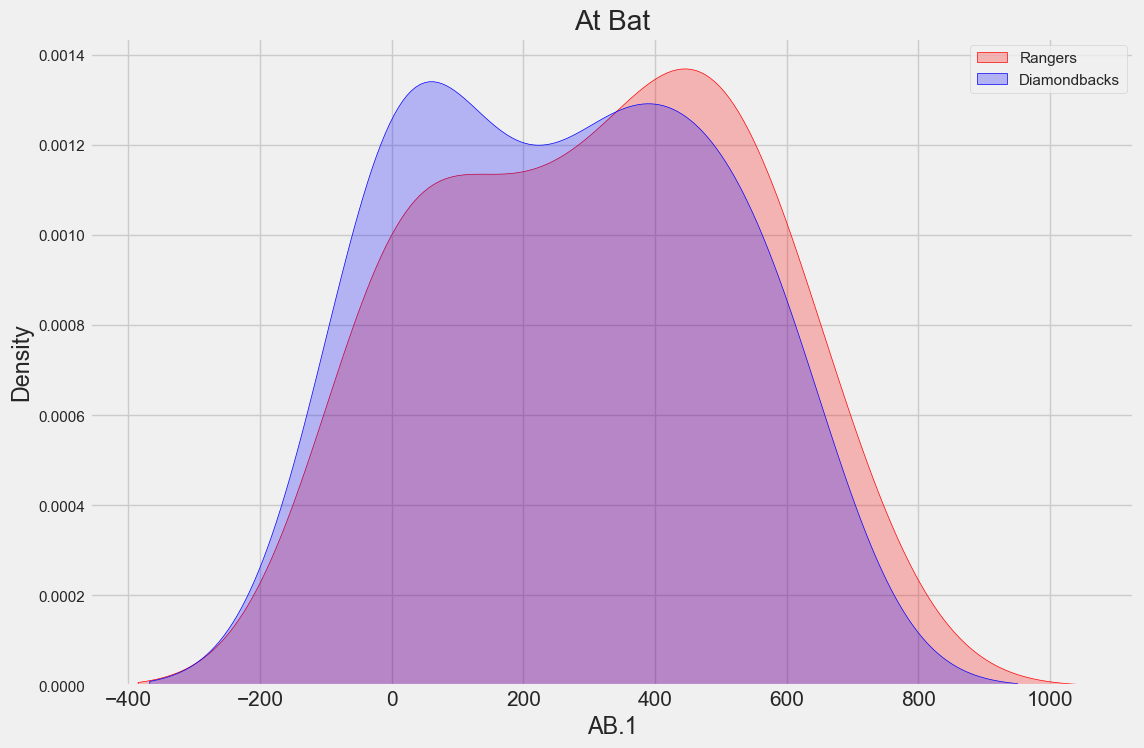

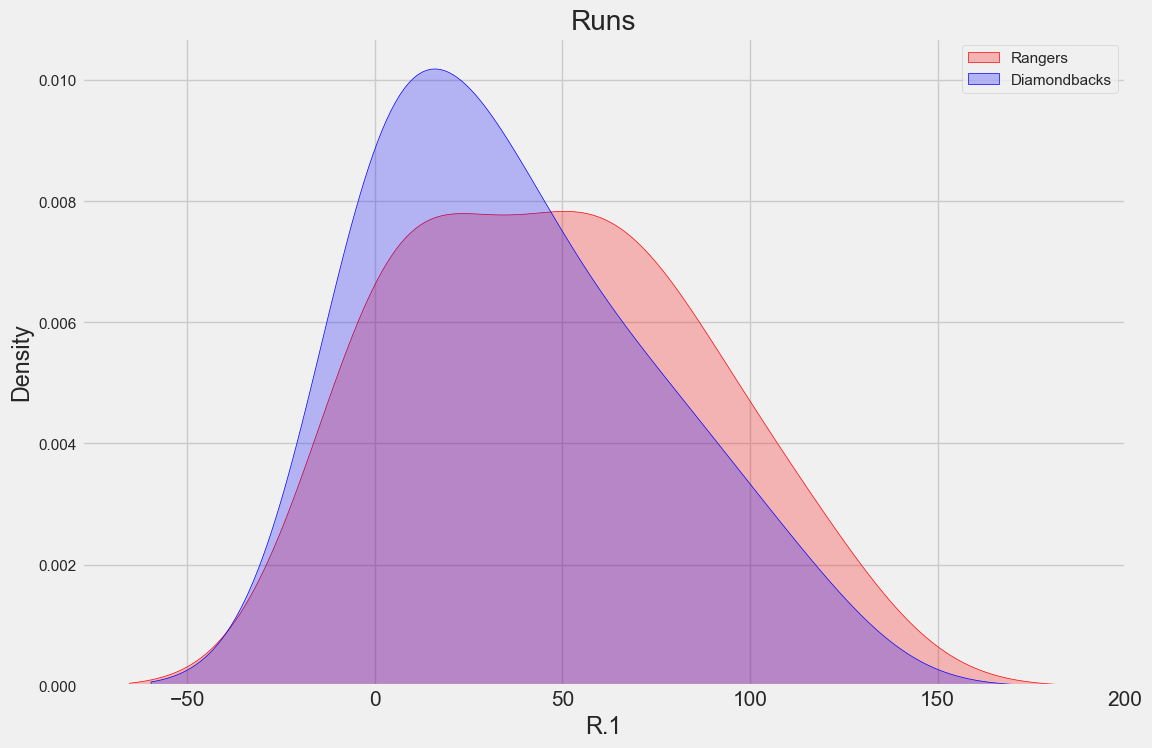

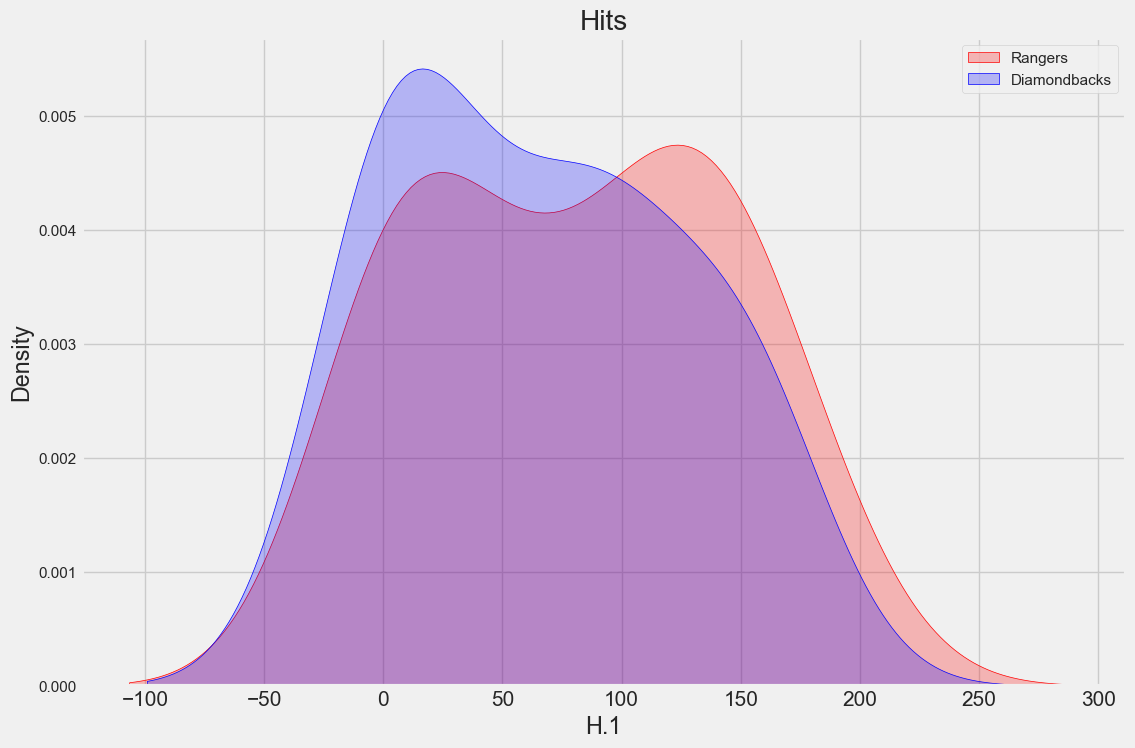

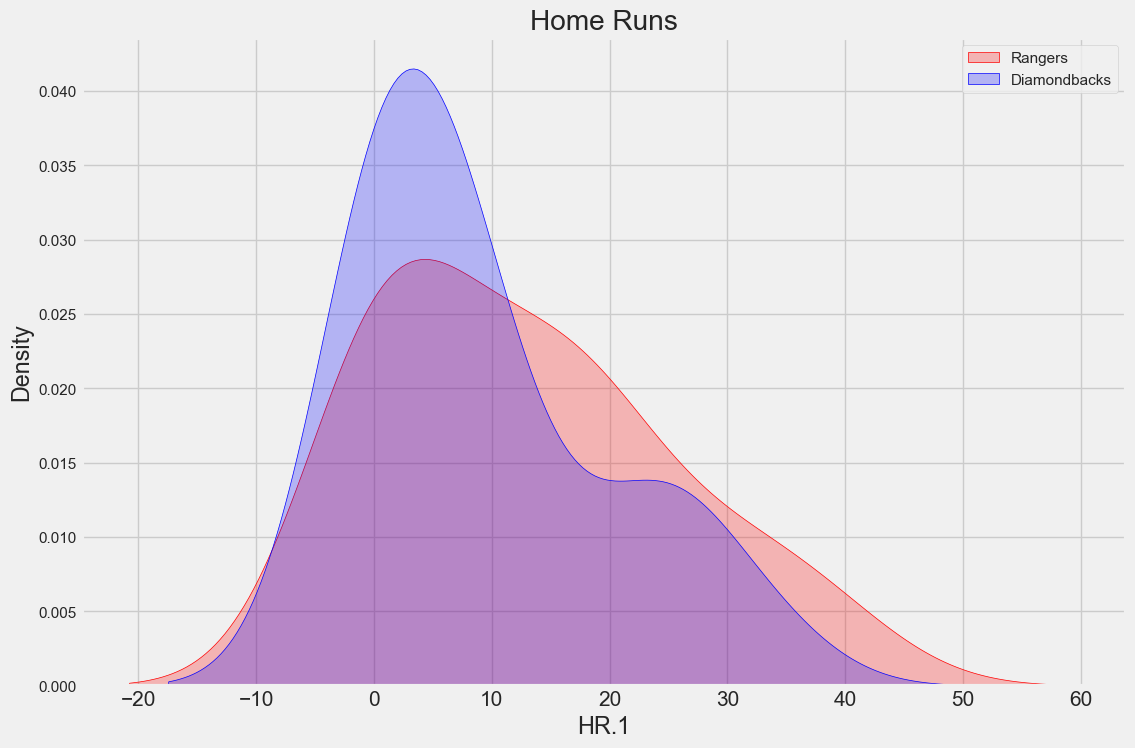

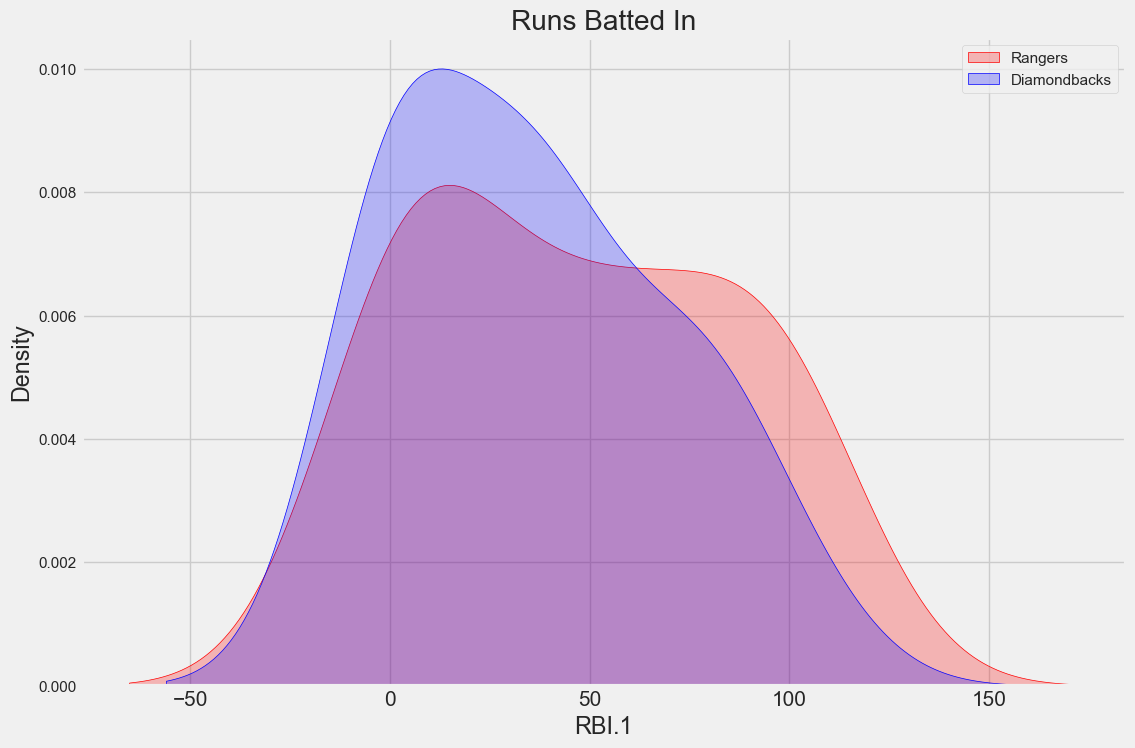

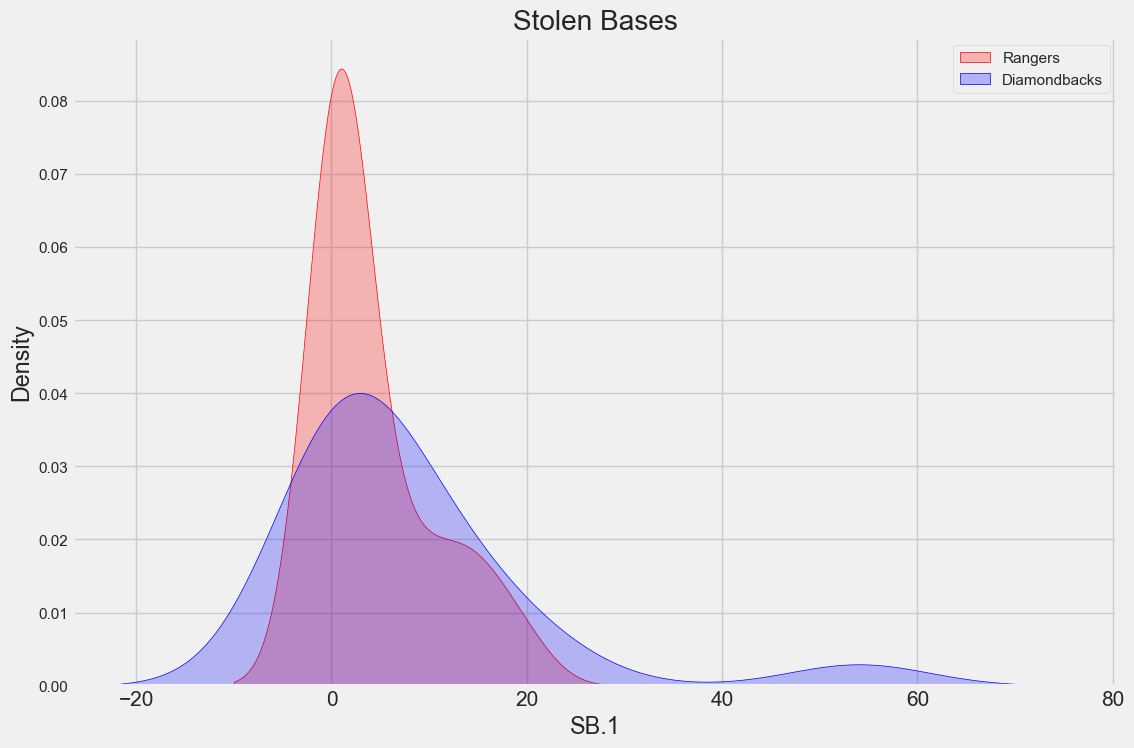

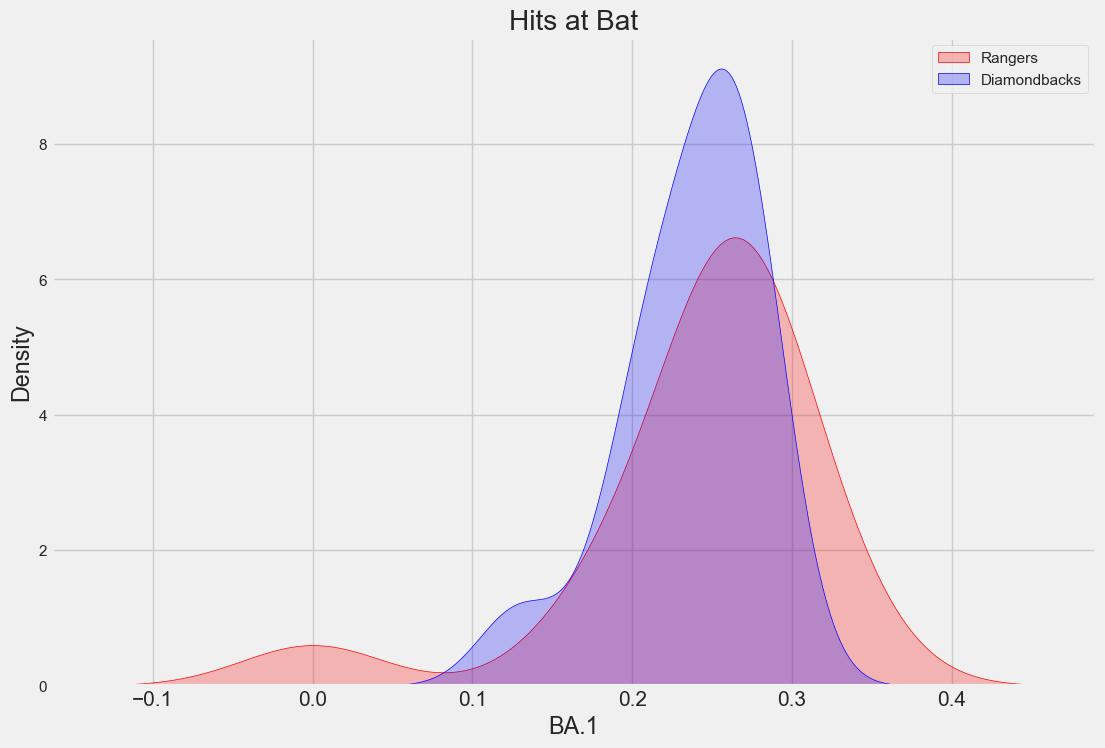

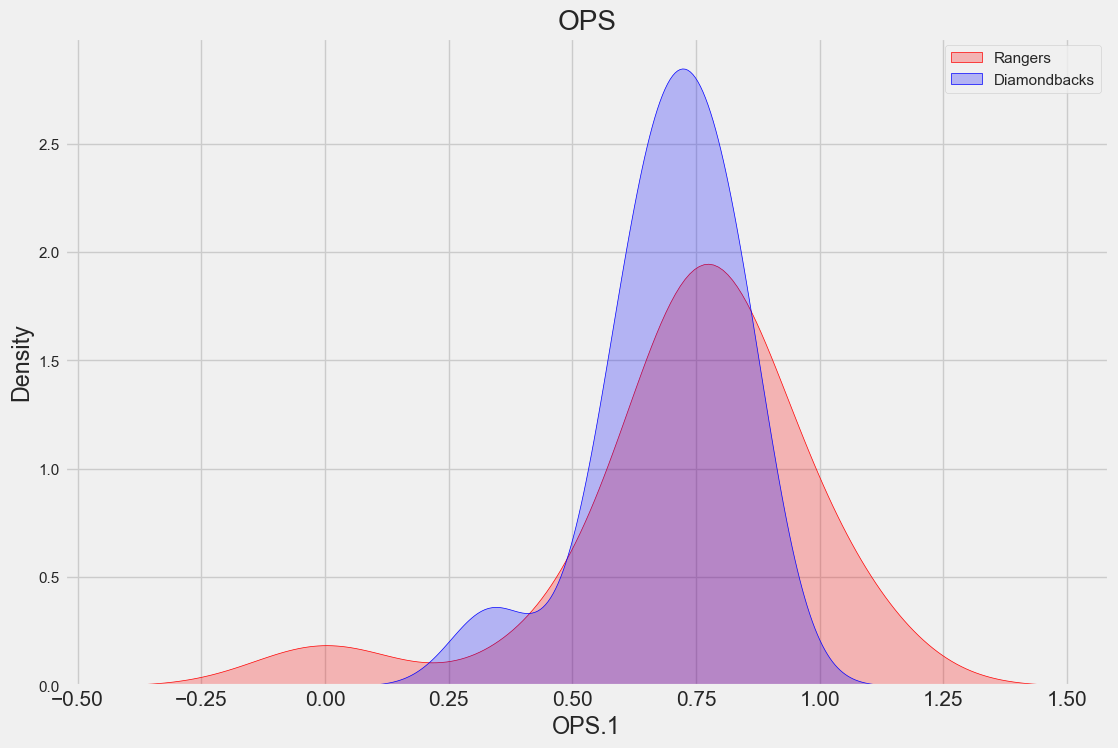

In [35]:
# Define the columns to be plotted
stats = ["At Bat", "Runs", "Hits", "Home Runs", "Runs Batted In", "Stolen Bases", "Hits at Bat", "OPS"]

# List of team names and their corresponding colors
team_colors = ["red", "blue"]

j = -1

for i in ["AB.1", "R.1", "H.1", "HR.1", "RBI.1", "SB.1", "BA.1", "OPS.1"]:
    
    sns.kdeplot(rsb.loc[(rsb["Team"] == "Rangers"), i].dropna(),
                color=team_colors[0], fill=True, label="Rangers")
    
    sns.kdeplot(rsb.loc[(rsb["Team"] == "Diamondbacks"), i].dropna(),
                color=team_colors[1], fill=True, label="Diamondbacks")
    
    j += 1

    plt.xticks(fontsize=15)
    plt.legend()
    plt.title(stats[j])
    plt.show()

# World Series Pitching Stats

In [36]:
wsp.head()

,Team,Name,G,GS,ERA,W,L,SV,CG,IP,H,R,ER,BB,SO,WHIP,WPA,cWPA
0,Rangers,Cody Bradford*,2,0,0.00,0,0,0,0,2.0,0,0,0,0,1,0.000,0.05,1.65%
1,Rangers,Brock Burke*,1,0,81.00,0,0,0,0,0.1,3,3,3,0,0,9.000,0.00,-0.05%
2,Rangers,Aroldis Chapman*,2,0,5.40,0,0,0,0,1.2,2,1,1,1,2,1.800,0.07,1.83%
3,Rangers,Dane Dunning,3,0,0.00,0,0,0,0,2.1,3,0,0,1,0,1.714,0.08,2.58%
4,Rangers,Nathan Eovaldi,2,2,4.22,1,0,0,0,10.2,10,5,5,6,13,1.500,0.01,-3.72%


In [37]:
wsp[wsp["Team"] == "Rangers"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
ERA,14.000000,10.872143,21.635348,0.000000,0.000000,2.905000,11.625000,81.000000
IP,14.000000,3.107143,2.649663,0.100000,1.125000,2.550000,3.925000,10.200000
WHIP,14.000000,1.987714,2.367914,0.000000,0.758750,1.500000,1.702250,9.000000
WPA,14.000000,0.080714,0.128210,-0.070000,0.002500,0.050000,0.132500,0.380000


In [38]:
wsp[wsp["Team"] == "Diamondbacks"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
ERA,12.000000,6.756667,11.837173,0.000000,0.000000,2.345000,4.160000,36.000000
IP,12.000000,3.725000,2.944679,1.000000,2.075000,2.600000,5.100000,11.100000
WHIP,12.000000,1.722500,1.430036,0.429000,0.783500,1.229000,2.000000,5.000000
WPA,12.000000,-0.029167,0.293024,-0.640000,-0.062500,0.045000,0.112500,0.320000


# World Series Pitching Visuals

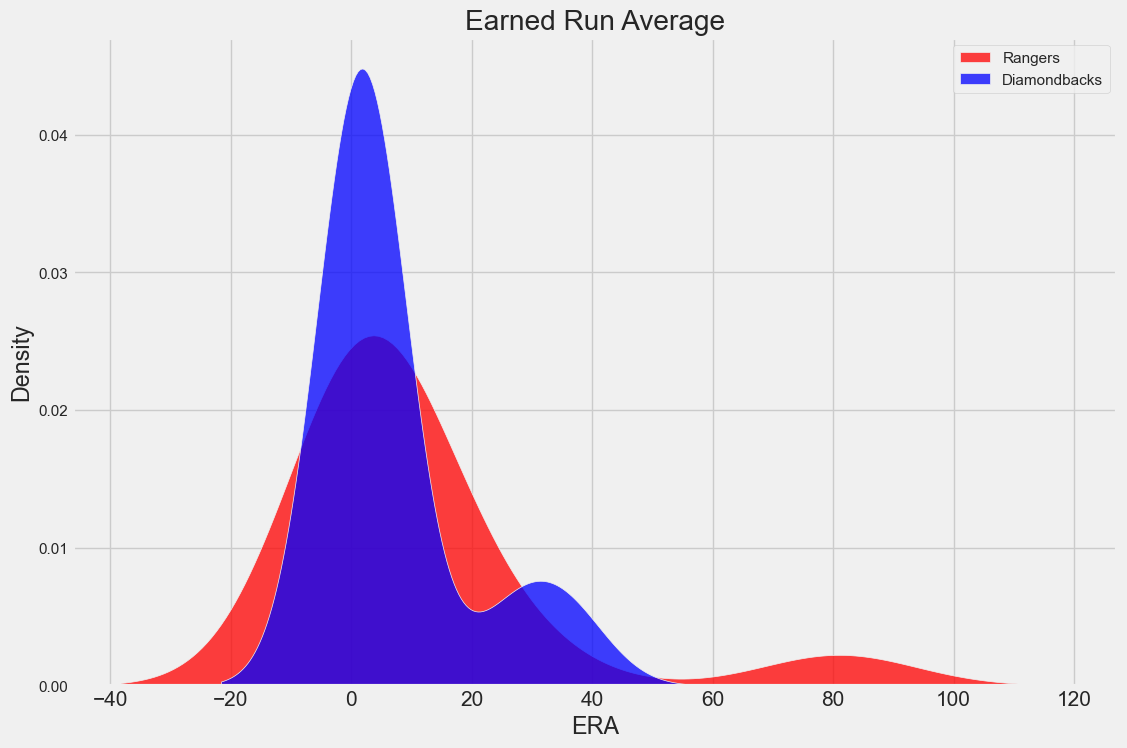

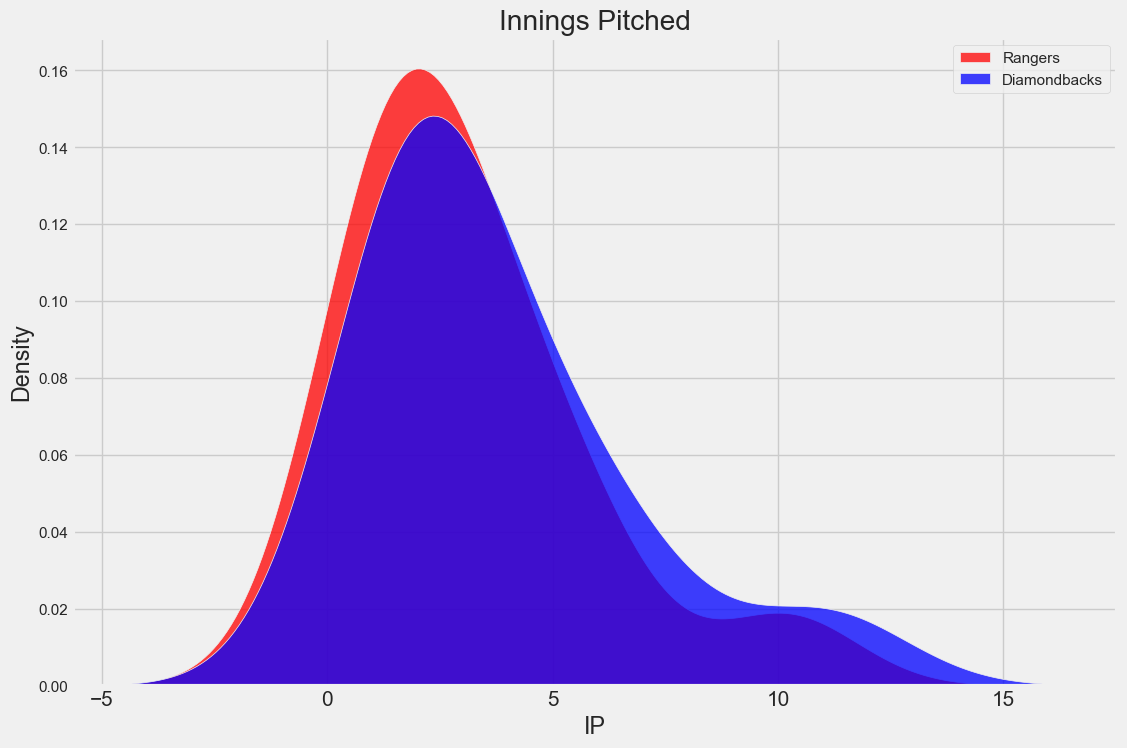

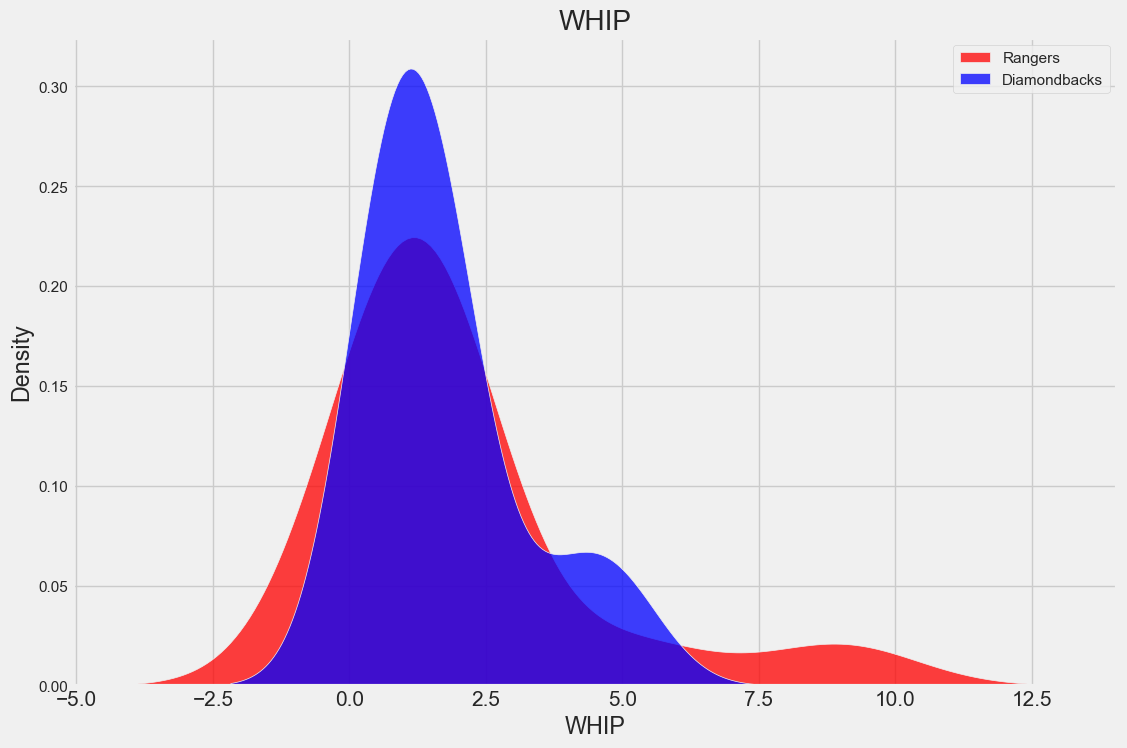

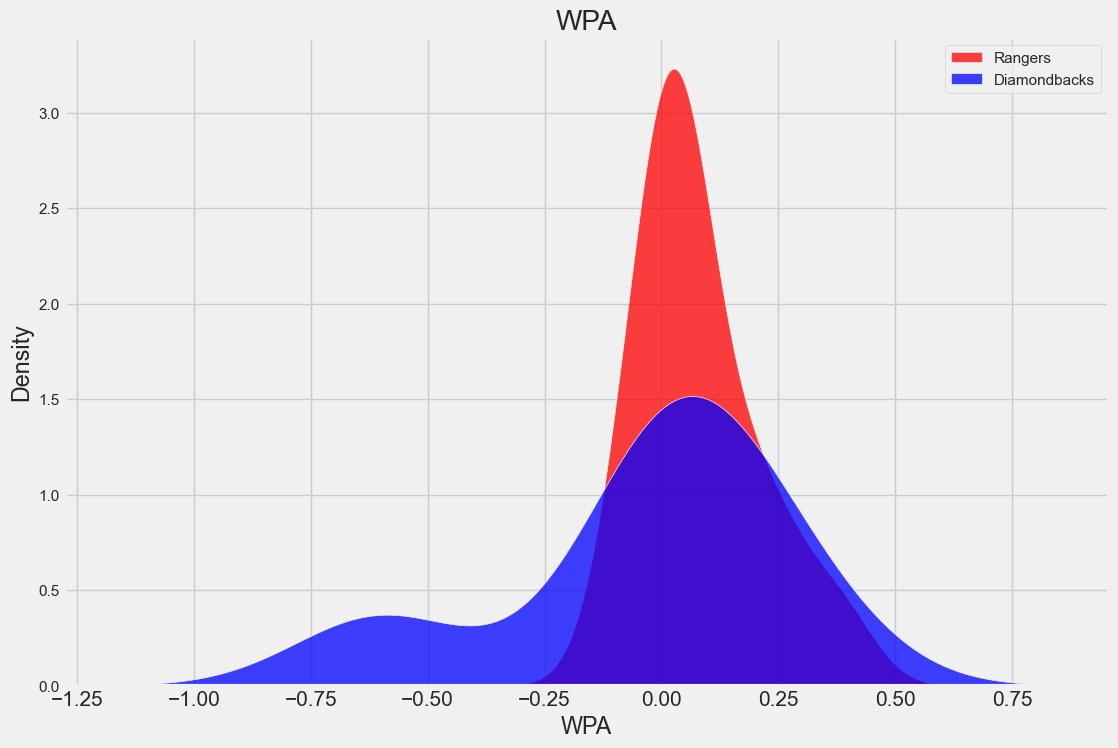

In [39]:
stats = ["Earned Run Average", "Innings Pitched", 
         "WHIP", "WPA"]

j = -1

for i in ["ERA", "IP", "WHIP", "WPA"]:
    
    sns.kdeplot(wsp.loc[(wsp["Team"] == "Rangers"), i], #bw_adjust = .75,
                color = team_colors[0], fill = True, multiple = "stack")
    
    sns.kdeplot(wsp.loc[(wsp["Team"] == "Diamondbacks"), i], #bw_adjust = .75,
                color = team_colors[1], fill = True, multiple = "stack")
    
    j += 1
    
    plt.xticks(fontsize = 15)
    plt.legend(labels = ["Rangers", "Diamondbacks"])
    plt.title(stats[j])
    plt.show()


# Regular Season Pitching Stats

In [40]:
rsp[rsp["Team"] == "Rangers"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
ERA.1,14.000000,4.020000,0.782865,2.680000,3.647500,4.020000,4.392500,5.500000
IP.1,14.000000,108.835714,52.178033,52.100000,57.350000,111.700000,150.925000,188.200000
WHIP.1,14.000000,1.211643,0.098589,1.064000,1.139250,1.203500,1.260000,1.405000


In [41]:
rsp[rsp["Team"] == "Diamondbacks"].describe(include = "float").T \
                                          .style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
ERA.1,12.000000,3.698333,1.477134,0.000000,3.247500,3.940000,4.387500,5.720000
IP.1,12.000000,81.916667,62.916609,10.100000,37.000000,62.200000,108.000000,210.000000
WHIP.1,12.000000,1.198083,0.182600,0.913000,1.105500,1.164500,1.329500,1.516000


# Regular Season Pitching Visuals

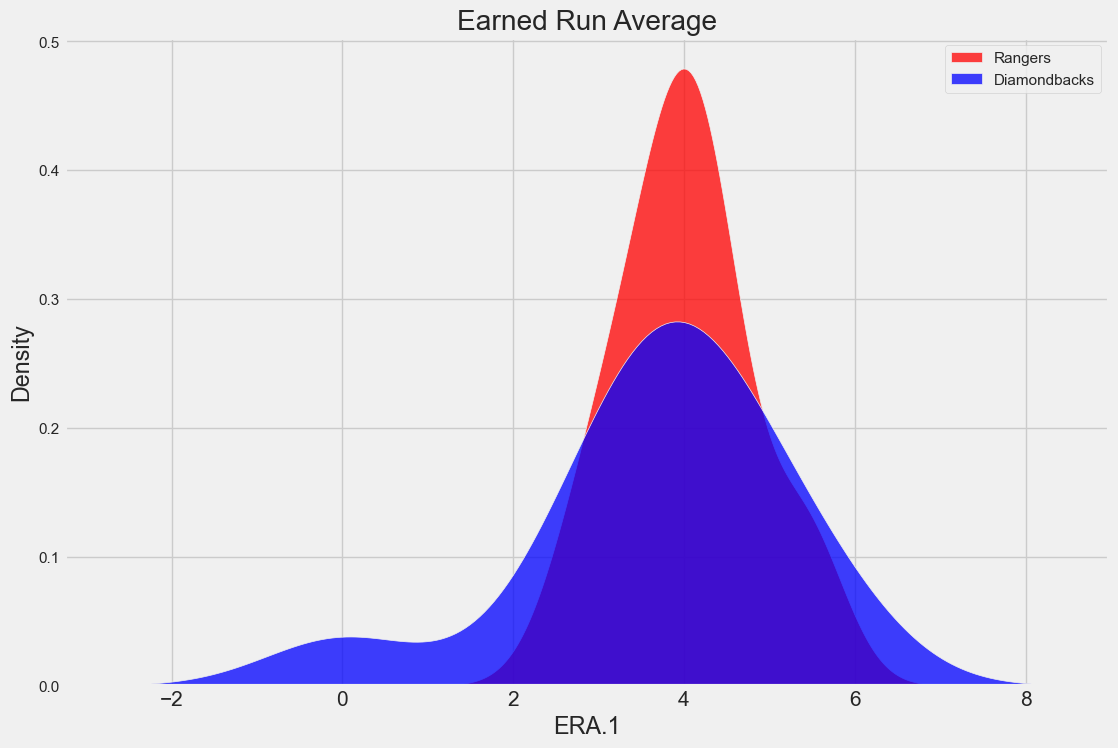

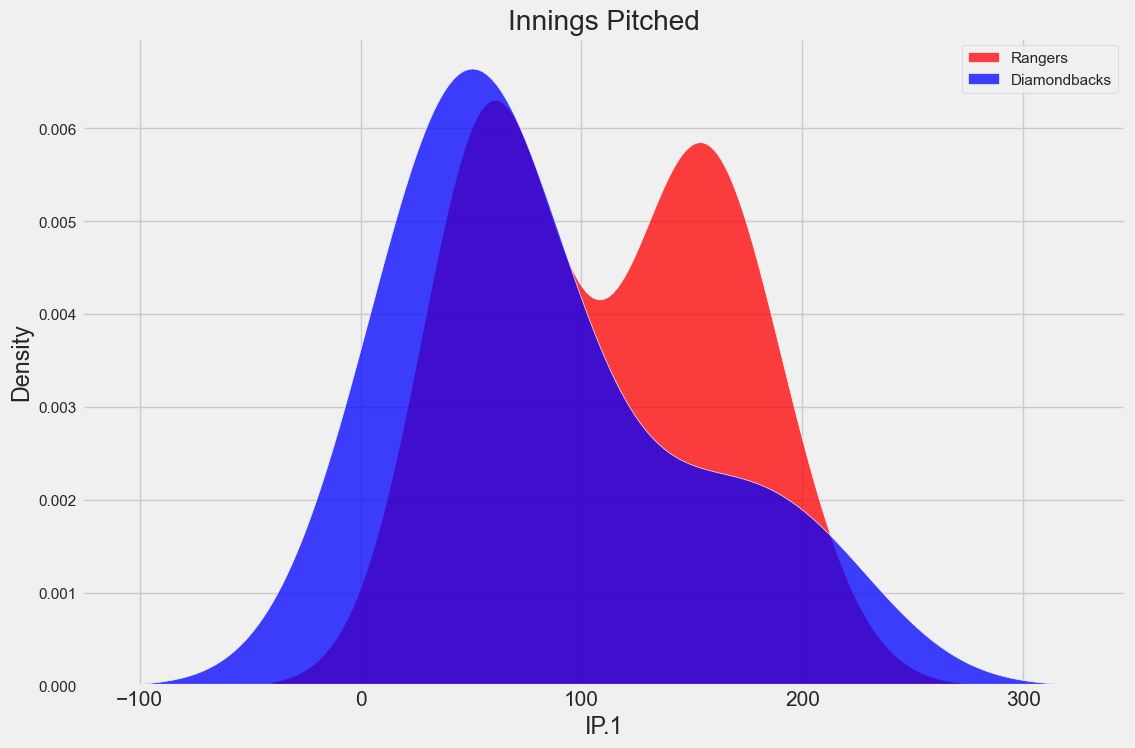

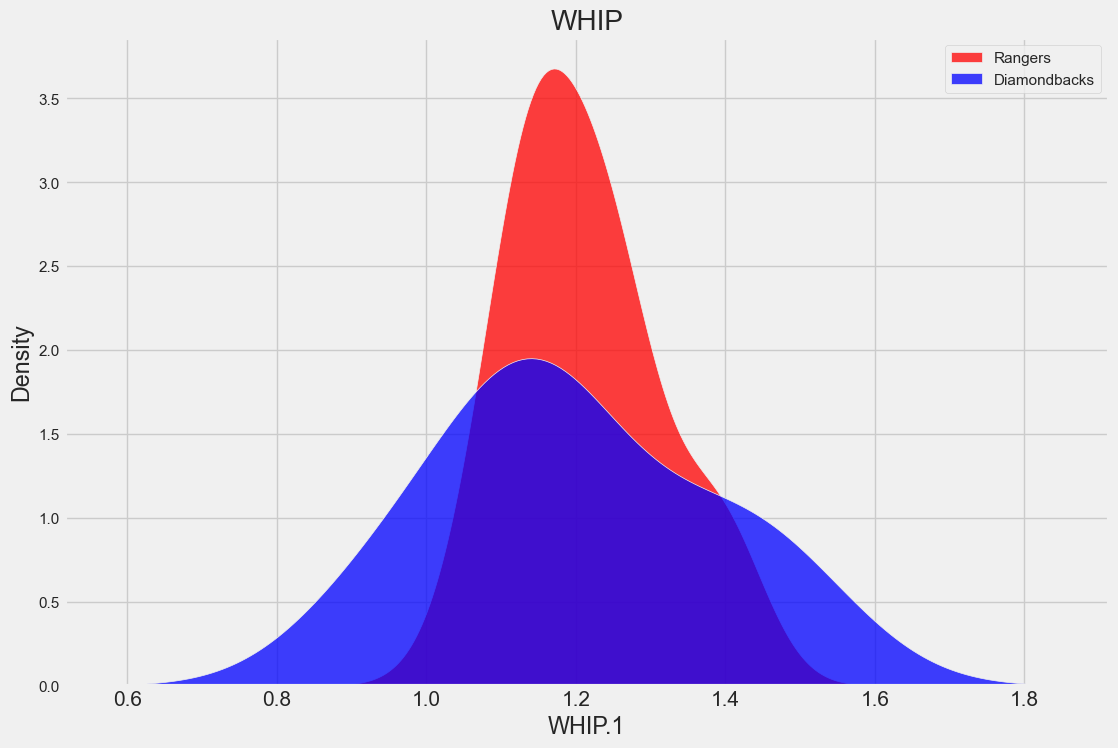

In [42]:
stats = ["Earned Run Average", "Innings Pitched", 
         "WHIP"]

j = -1

for i in ["ERA.1", "IP.1", "WHIP.1"]:
    
    sns.kdeplot(rsp.loc[(wsp["Team"] == "Rangers"), i], #bw_adjust = .75,
                color = team_colors[0], fill = True, multiple = "stack")
    
    sns.kdeplot(rsp.loc[(wsp["Team"] == "Diamondbacks"), i], #bw_adjust = .75,
                color = team_colors[1], fill = True, multiple = "stack")
    
    j += 1
    
    plt.xticks(fontsize = 15)
    plt.legend(labels = ["Rangers", "Diamondbacks"])
    plt.title(stats[j])
    plt.show()


In [50]:
import plotly.express as px
 
colors = ["#125D98", "#F86D24"]

# Create a bar chart
fig = px.bar(
wsb,
x="Team",
y=["SB", "CS"],
barmode="group",
hover_data=["Name"],
color="variable",
color_discrete_sequence=colors,
)

# Customize layout
fig.update_layout(
  title="2023 World Series Baserunning Stats",
  plot_bgcolor="#0F2030",
  paper_bgcolor="#0F2030", 
  font_family="Open Sans",
  font_color="white",
  legend_title_font_color="white",
  yaxis_title="Total Bases"  
)

# Increase figure size
fig.update_layout(width=800, height=500)

# Show figure
fig.show()

In [51]:
# Create a bar chart
fig = px.bar(
wsb,
x="Team",
y=["E"],
barmode="group",
hover_data=["Name"],
color="variable",
color_discrete_sequence=colors,
)

# Customize layout
fig.update_layout(
  title="Errors Committed in 2023 World Series",
  plot_bgcolor="#0F2030",
  paper_bgcolor="#0F2030", 
  font_family="Open Sans",
  font_color="white",
  legend_title_font_color="white",
  yaxis_title="Total Errors"  
)

# Increase figure size
fig.update_layout(width=800, height=500)

# Show figure
fig.show()

In [48]:
# Create a bar chart
fig = px.bar(
wsb,
x="Team",
y=["R"],
barmode="group",
hover_data=["Name"],
color="variable",
color_discrete_sequence=colors,
)

# Customize layout
fig.update_layout(
  title="2023 World Series Runs Scored",
  plot_bgcolor="#0F2030",
  paper_bgcolor="#0F2030", 
  font_family="Open Sans",
  font_color="white",
  legend_title_font_color="white",
  yaxis_title="Total Errors"  
)

# Increase figure size
fig.update_layout(width=800, height=500)

# Show figure
fig.show()

In [49]:
# Create a bar chart
fig = px.bar(
wsb,
x="Team",
y=["HR"],
barmode="group",
hover_data=["Name"],
color="variable",
color_discrete_sequence=colors,
)

# Customize layout
fig.update_layout(
  title="2023 World Series Home Run Scored",
  plot_bgcolor="#0F2030",
  paper_bgcolor="#0F2030", 
  font_family="Open Sans",
  font_color="white",
  legend_title_font_color="white",
  yaxis_title="Total runs"  
)

# Increase figure size
fig.update_layout(width=800, height=500)

# Show figure
fig.show()